# Problem Statement:
Attrition is a problem that impacts all businesses, irrespective of geography, industry and size of the company. Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff and training new staff. As such, there is great business interest in understanding the drivers of, and minimizing staff attrition.

This data set presents an employee survey from IBM, indicating if there is attrition or not. The data set contains approximately 24000 entries. Given the limited size of the data set, the model should only be expected to provide modest improvement in indentification of attrition vs a random allocation of probability of attrition.

While some level of attrition in a company is inevitable, minimizing it and being prepared for the cases that cannot be helped will significantly help improve the operations of most businesses. As a future development, with a sufficiently large data set, it would be used to run a segmentation on employees, to develop certain “at risk” categories of employees. This could generate new insights for the business on what drives attrition, insights that cannot be generated by merely informational interviews with employees.

Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Increasing the display width

In [3]:
pd.set_option('display.max_columns',37)

In [1]:
df=pd.read_csv('F:\data science\data sets\IBM_HR.csv')


NameError: name 'pd' is not defined

In [5]:
df.head()

NameError: name 'df' is not defined

In [6]:
df.shape

NameError: name 'df' is not defined

# Checking for the null values:

In [6]:
df.isnull().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

# cheacking percentage of null values 

In [1]:
Null_values_percentage=(df.isnull().sum().sum()/len(df))*100
Null_values_percentage


NameError: name 'df' is not defined

In [8]:
### Inference: As there is only 1.5% of total null values in dataset, we will drop those null values

In [9]:
df=df.dropna()
df.shape

(23204, 37)

# Checking for duplicate values:

In [317]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(23190, 37)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  object 
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EmployeeCount             23190 non-null  object 
 9   EmployeeNumber            23190 non-null  object 
 10  Application ID            23190 non-null  object 
 11  EnvironmentSatisfaction   23190 non-null  float64
 12  Gender                    23190 non-null  object 
 13  HourlyRate                23190 non-null  object 
 14  JobInv

# DATA VISUALIZATION

# Age

In [12]:
df['Age'].value_counts()

35.0    1218
34.0    1210
36.0    1101
31.0    1079
29.0    1073
32.0     956
30.0     950
38.0     941
33.0     917
40.0     871
37.0     791
27.0     772
28.0     752
42.0     734
39.0     659
45.0     644
41.0     640
26.0     598
44.0     525
46.0     518
43.0     511
50.0     477
24.0     416
25.0     411
47.0     383
49.0     382
55.0     328
53.0     308
48.0     301
51.0     301
52.0     287
54.0     285
22.0     257
58.0     223
23.0     223
56.0     220
21.0     208
20.0     174
59.0     148
19.0     130
18.0     127
60.0      80
57.0      61
Name: Age, dtype: int64

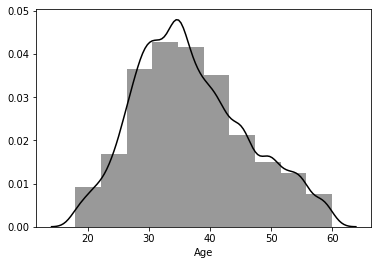

In [13]:
sns.distplot(df['Age'],hist=True,kde=True,color='k',bins=10)

In [14]:

# Majority of employees lie between the age range of 30 to 40

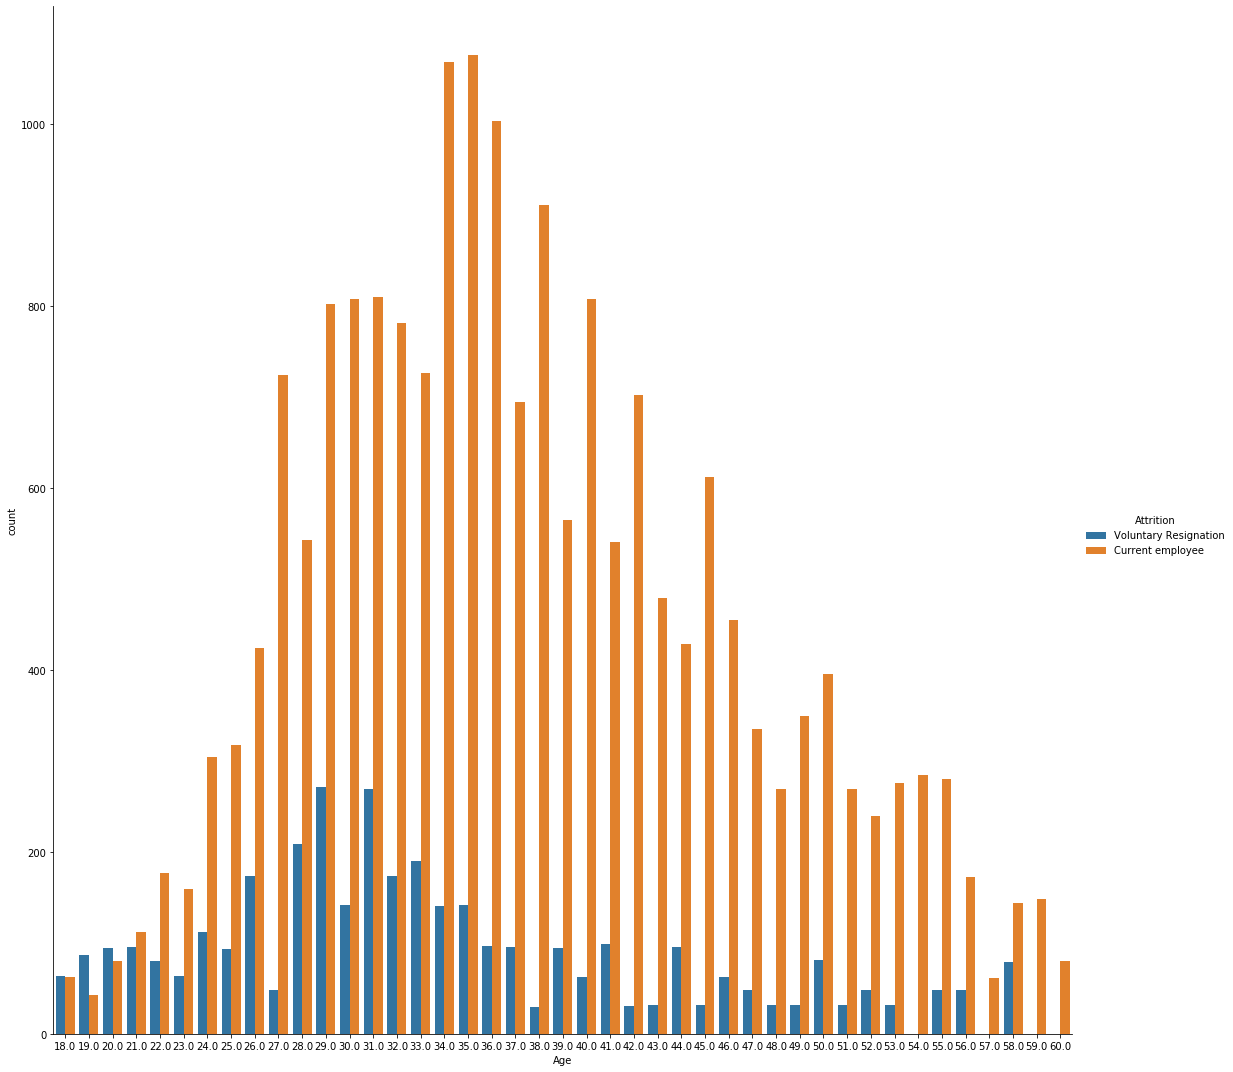

In [15]:

sns.catplot(x='Age',hue='Attrition',data=df,kind='count',height=15)

In [16]:
# Majority of attritions can be seen in 28 to 33 age group range

# Attrition - Target Variable

In [17]:

df['Attrition'].value_counts()

Current employee         19527
Voluntary Resignation     3663
Name: Attrition, dtype: int64

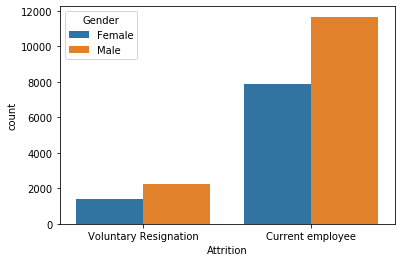

In [18]:

sns.countplot(x='Attrition',data=df,hue='Gender')

In [19]:
# Count of male employees are more in case of attrition

# Business Travel

In [20]:
df['BusinessTravel'].value_counts()

Travel_Rarely        16443
Travel_Frequently     4376
Non-Travel            2371
Name: BusinessTravel, dtype: int64

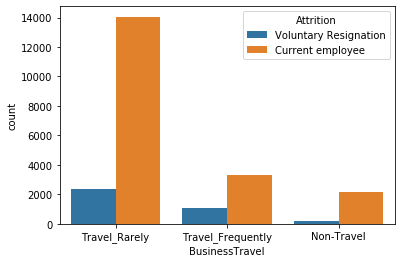

In [21]:
sns.countplot(x='BusinessTravel',data=df,hue='Attrition')

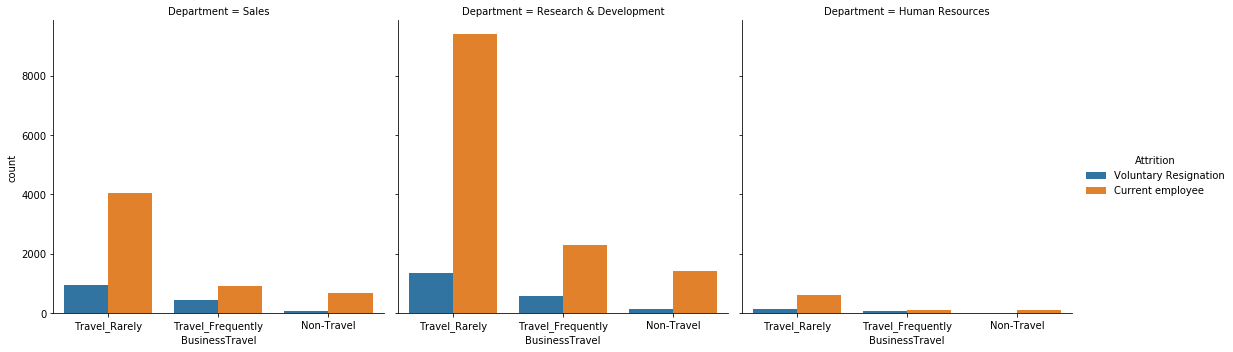

In [22]:
sns.catplot(x='BusinessTravel',data=df,hue='Attrition',col='Department',kind='count',height=5)

In [23]:

# Wrt all the departments we can conclude that 'Travel_Frequently Business Travel' are in the verge towards attrition for HR Dept.

# Daily Rate

In [24]:
df['DailyRate'].value_counts()

691.0     99
1329.0    80
408.0     80
329.0     79
530.0     78
          ..
1122.0    14
1387.0    14
363.0     14
452.0     14
573.0     14
Name: DailyRate, Length: 883, dtype: int64

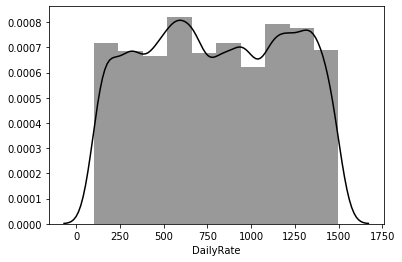

In [25]:

sns.distplot(df['DailyRate'],bins=10,color='k')

In [26]:
df['DailyRate'].mean()

802.2463130659767

In [27]:
 df['DailyRate'].min()

102.0

In [28]:
df['DailyRate'].max()

1499.0

In [29]:
# The average of daily rate is somewhere around 802,minimum is 102,and maximum is 1499.

# Department

In [30]:
df['Department'].value_counts()

Research & Development    15125
Sales                      7056
Human Resources            1009
Name: Department, dtype: int64

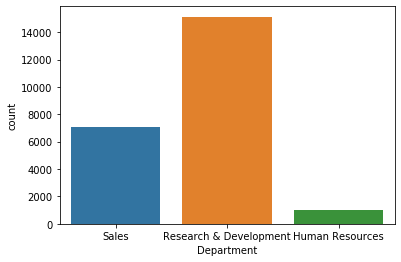

In [31]:
sns.countplot(df['Department'])

In [32]:

# Around 60% employees are working in R&D Department

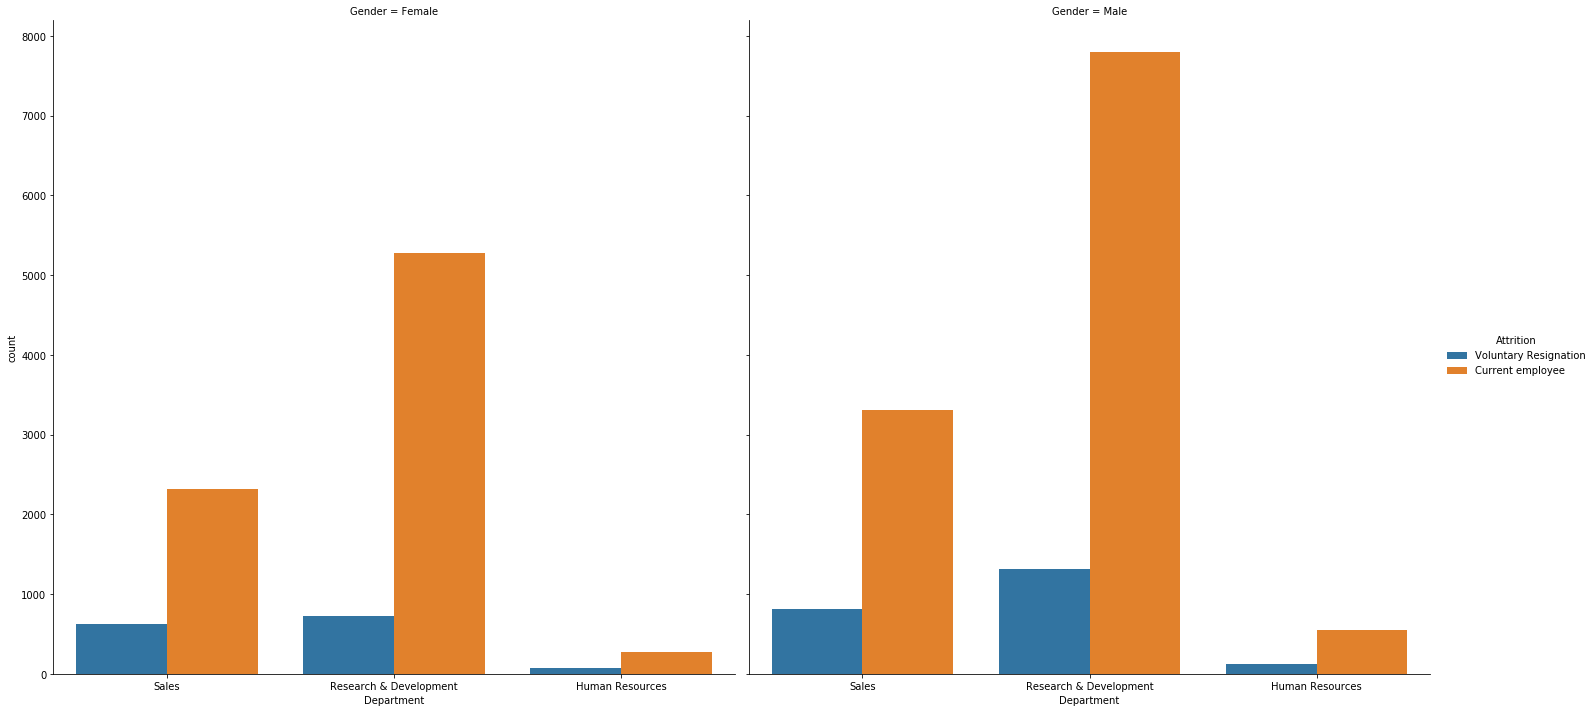

In [33]:
sns.catplot(x='Department',hue='Attrition',col='Gender',data=df,kind='count',height=10)

In [34]:
# Sales department has a high attrition rate

# DistanceFromHome

In [35]:
df['DistanceFromHome'].value_counts()

1       2380
2       2063
2.0     1239
3       1022
10       978
7        967
9        952
8        925
1.0      897
5        803
4        694
6        681
10.0     381
9.0      373
7.0      363
16       353
8.0      345
11       335
3.0      324
23       324
4.0      320
24       320
15       295
18       287
13       272
6.0      257
19       255
25       250
21       238
20       238
29       238
17       223
5.0      220
22       219
26.0     217
28       207
12       193
29.0     191
14       190
26       178
28.0     156
16.0     147
27       147
14.0     143
25.0     140
12.0     137
20.0     137
18.0     131
11.0     126
15.0     121
24.0     110
23.0     104
19.0      96
22.0      85
17.0      77
27.0      47
21.0      47
13.0      32
Name: DistanceFromHome, dtype: int64

In [36]:

# As from info it is observed that 'Distance From Home' is object type,so we converted it to numeric type

In [37]:
df['DistanceFromHome']=pd.to_numeric(df['DistanceFromHome'],errors='coerce')

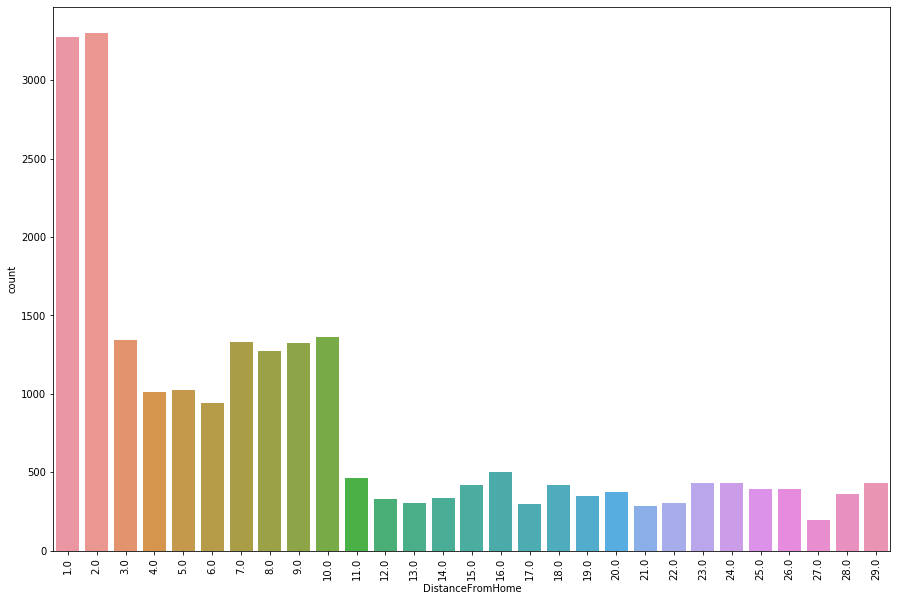

In [38]:
plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
sns.countplot(df['DistanceFromHome'])

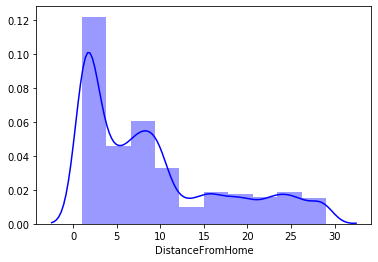

In [39]:
sns.distplot(df['DistanceFromHome'],color='blue',bins=10)

In [40]:
# From the above count plot we can see that there are multiple instances of some numbers in int and float,so we will convert all to a single datatype

In [41]:
df['DistanceFromHome']=df['DistanceFromHome'].astype('int')

In [42]:
df['DistanceFromHome'].value_counts()

2     3302
1     3277
10    1359
3     1346
7     1330
9     1325
8     1270
5     1023
4     1014
6      938
16     500
11     461
24     430
29     429
23     428
18     418
15     416
26     395
25     390
20     375
28     363
19     351
14     333
12     330
22     304
13     304
17     300
21     285
27     194
Name: DistanceFromHome, dtype: int64

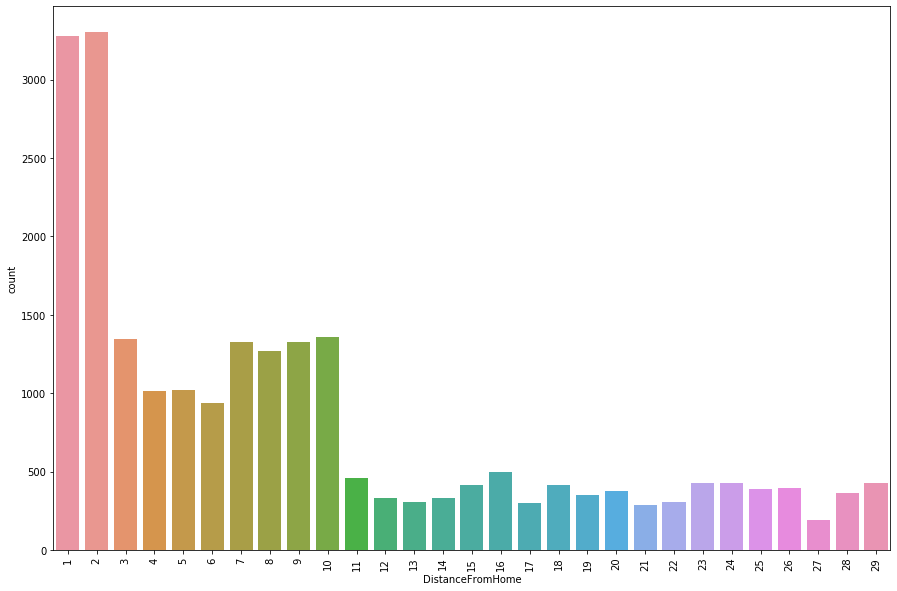

In [43]:
plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
sns.countplot(df['DistanceFromHome'])

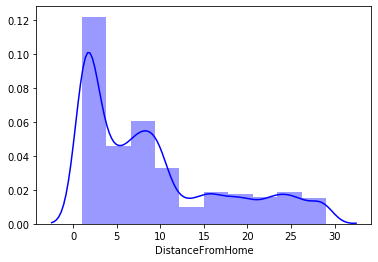

In [44]:

sns.distplot(df['DistanceFromHome'],color='b',bins=10)

In [45]:
df['DistanceFromHome'].mean()

9.188486416558861

In [46]:
df['DistanceFromHome'].min()

1

In [47]:
df['DistanceFromHome'].max()

29

In [48]:
# We can see that the avg distance from home is around 9Km, minimum is 1Km and maximum is 29Km.

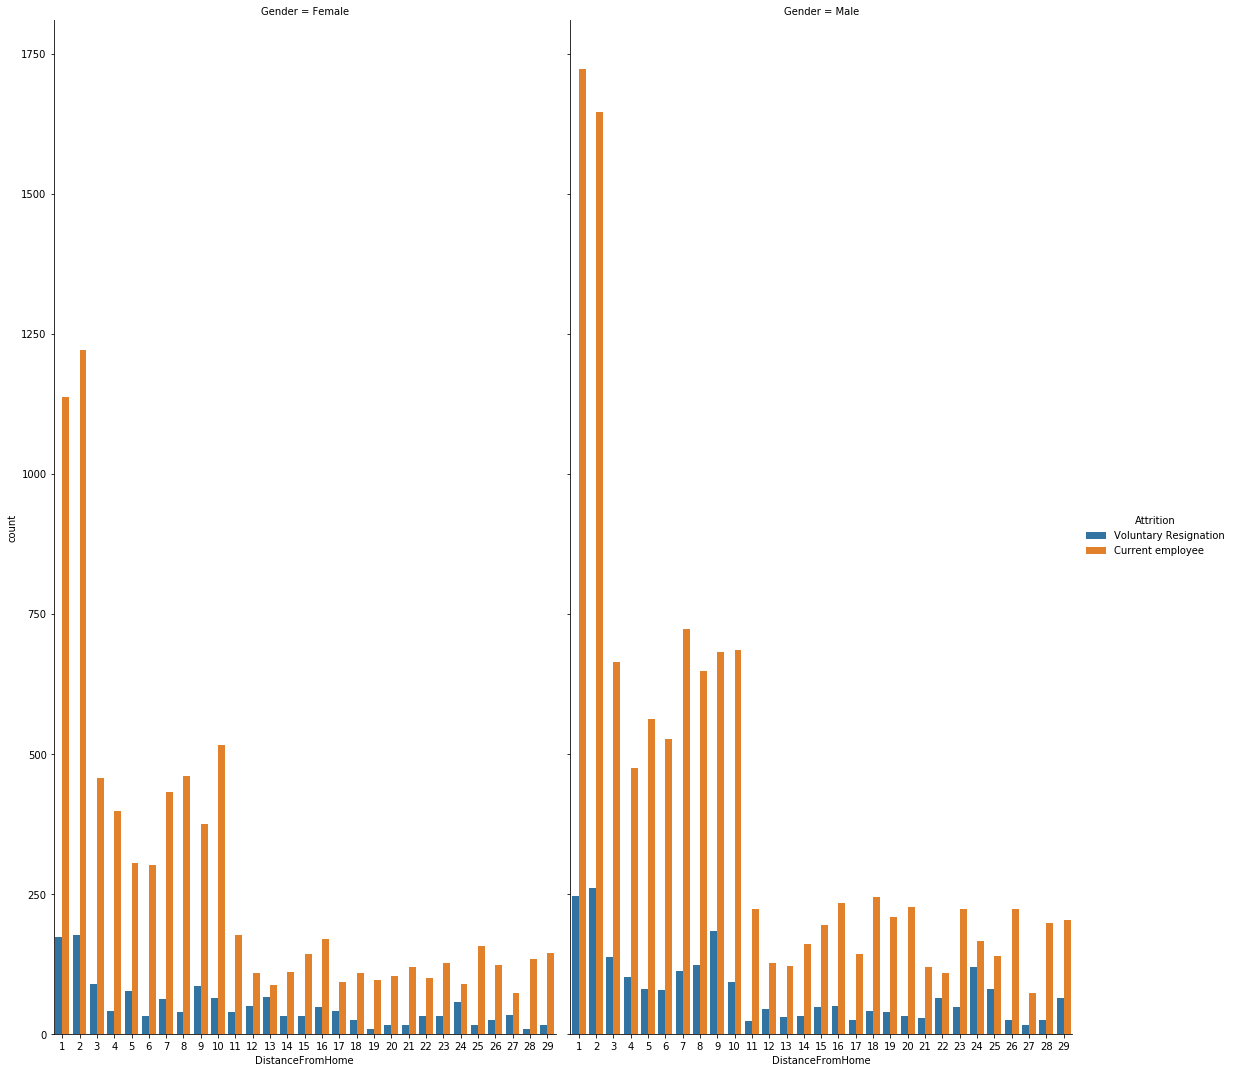

In [49]:
sns.catplot(x='DistanceFromHome',hue='Attrition',col='Gender',data=df,kind='count',height=15,aspect=0.5)

In [50]:
# in case of both male and female,attrition rate tends to be higher when the distance exceed 10Km.

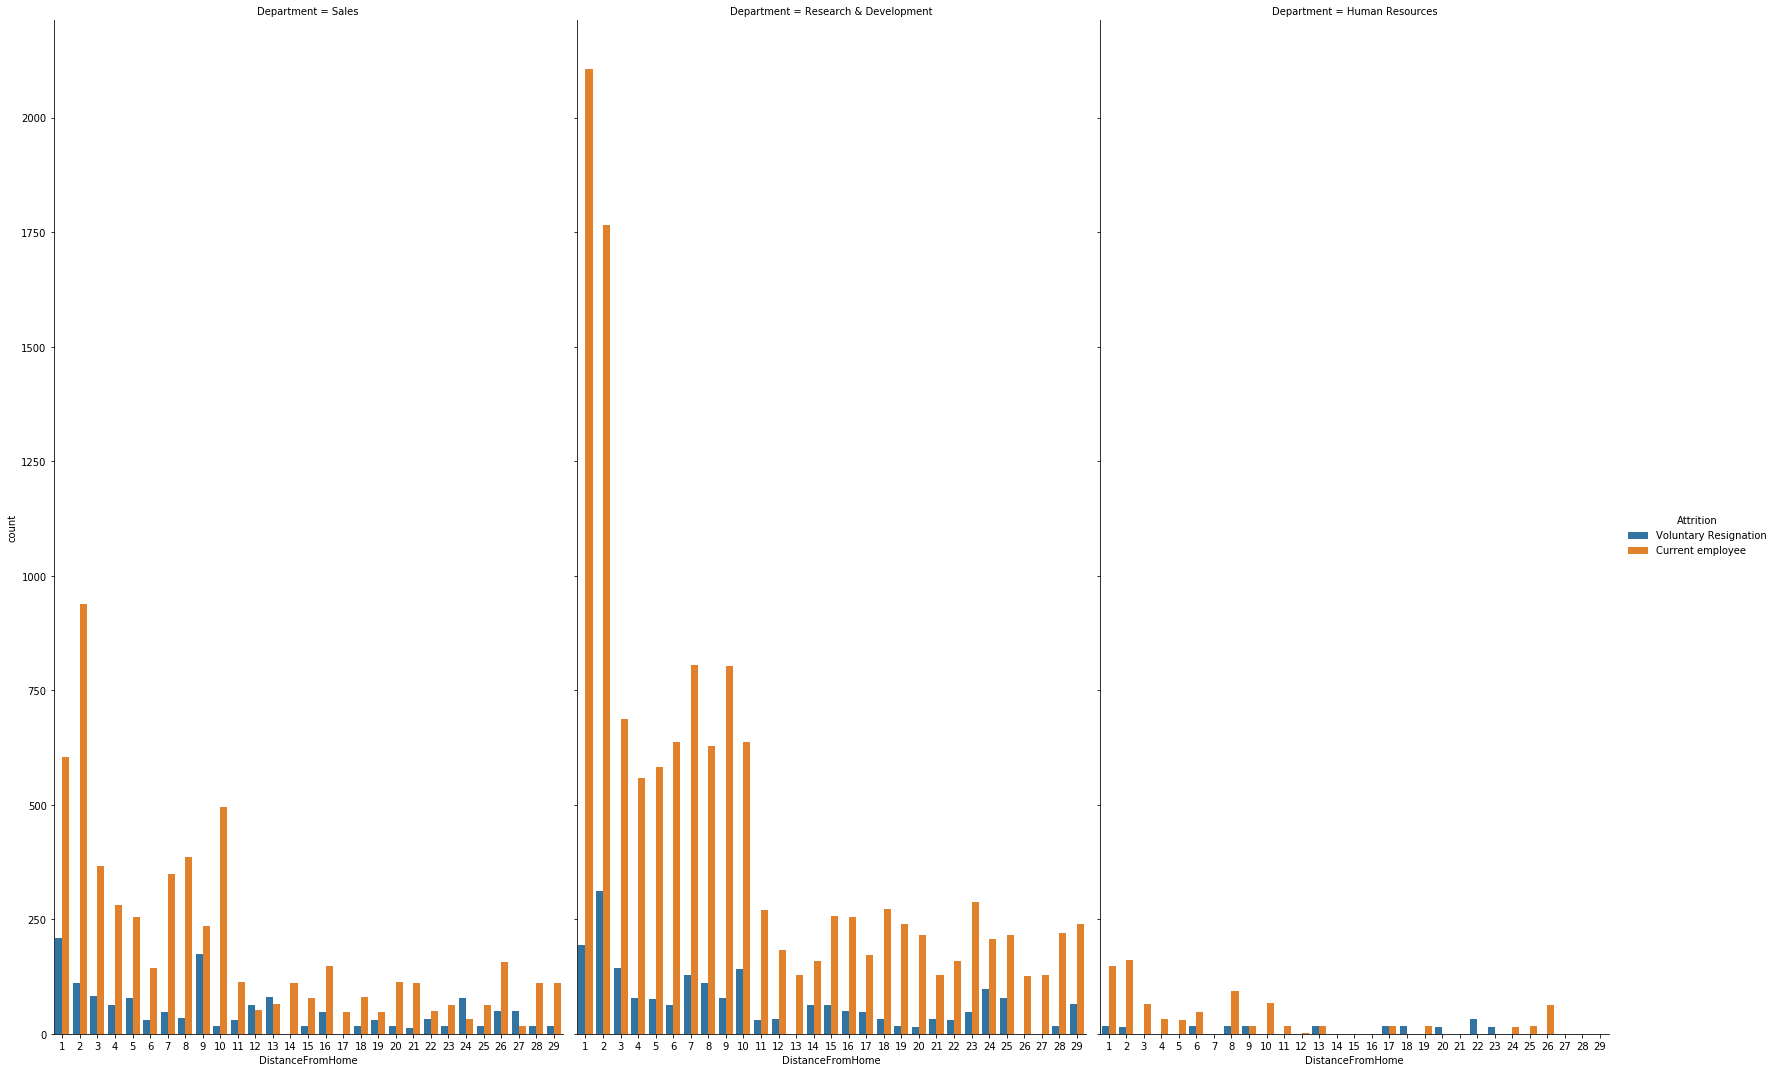

In [51]:

sns.catplot(x='DistanceFromHome',hue='Attrition',col='Department',data=df,kind='count',height=15,aspect=0.5)

In [52]:
 #In case of all departments,attrition rate tends to be higher when the distance exceed 10Km.

# Education

In [53]:
df['Education'].value_counts()

3.0    9006
4.0    6256
2.0    4472
1.0    2703
5.0     753
Name: Education, dtype: int64

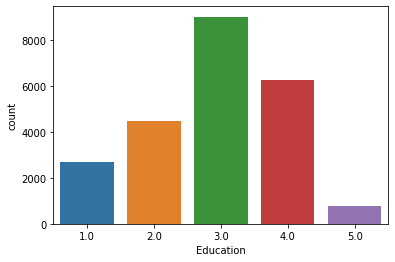

In [54]:
sns.countplot(df['Education'])

In [55]:
# Around 30% of employees have education level of 3

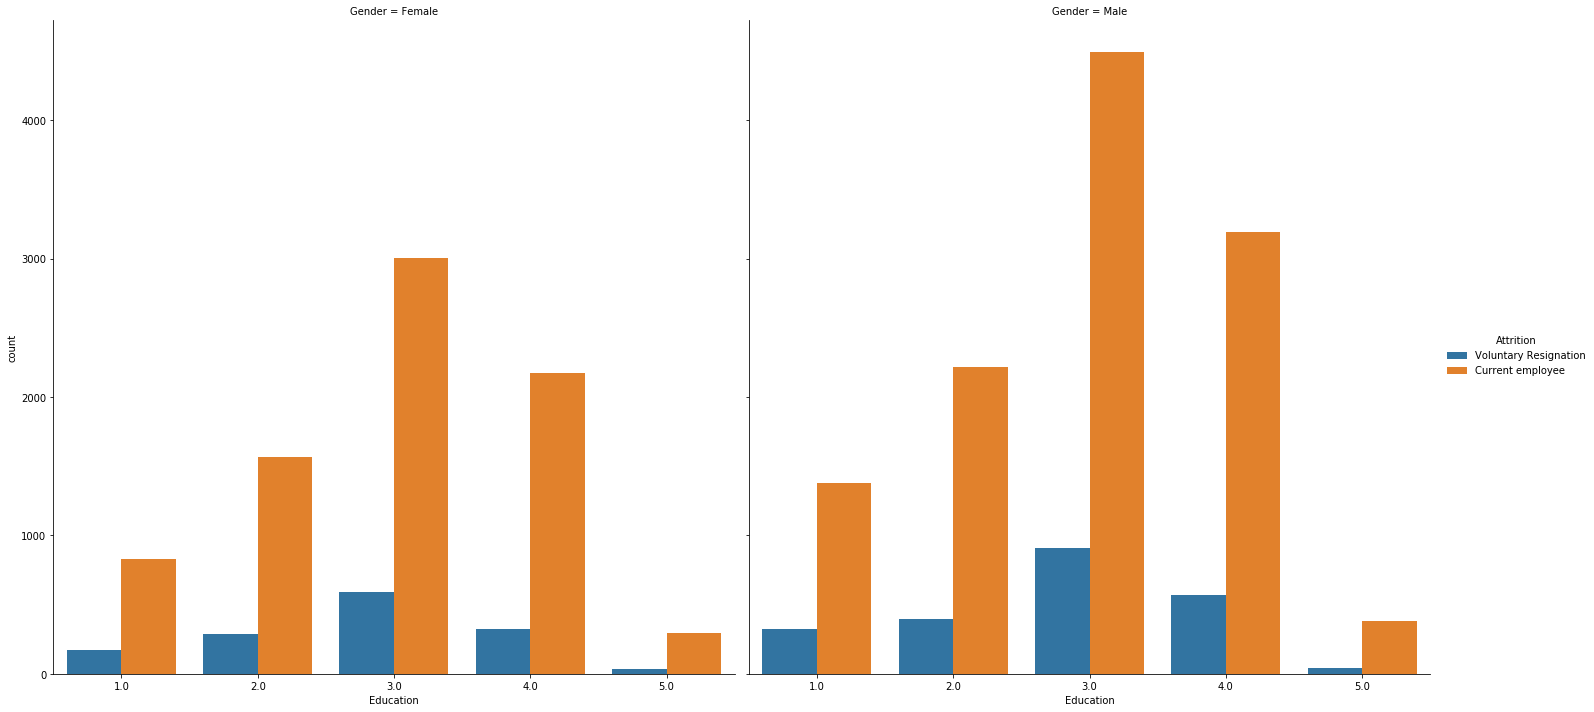

In [56]:
sns.catplot(x='Education',hue='Attrition',col='Gender',data=df,kind='count',height=10)

In [57]:
# For both male and female,attrition rate is higher for education level 1,2 and 3.

# EducationField

In [58]:
df['EducationField'].value_counts()

Life Sciences       9571
Medical             7296
Marketing           2524
Technical Degree    2053
Other               1304
Human Resources      441
Test                   1
Name: EducationField, dtype: int64

In [59]:
# As there is only 1 count in 'Test' category,so we will impute it in 'Other' category.

In [60]:
df.loc[df['EducationField']=='Test','EducationField']='Other'

In [61]:
df['EducationField'].value_counts()

Life Sciences       9571
Medical             7296
Marketing           2524
Technical Degree    2053
Other               1305
Human Resources      441
Name: EducationField, dtype: int64

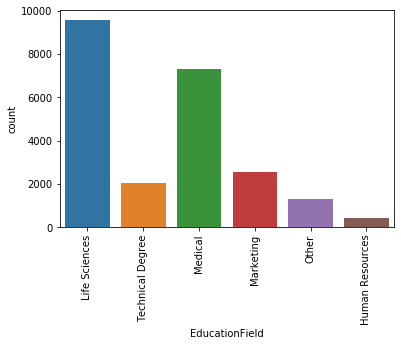

In [62]:
plt.xticks(rotation='vertical')
sns.countplot(df['EducationField'])

In [63]:
# Around 70% of employees are having 'Life Sciences' and 'Medical' education field.

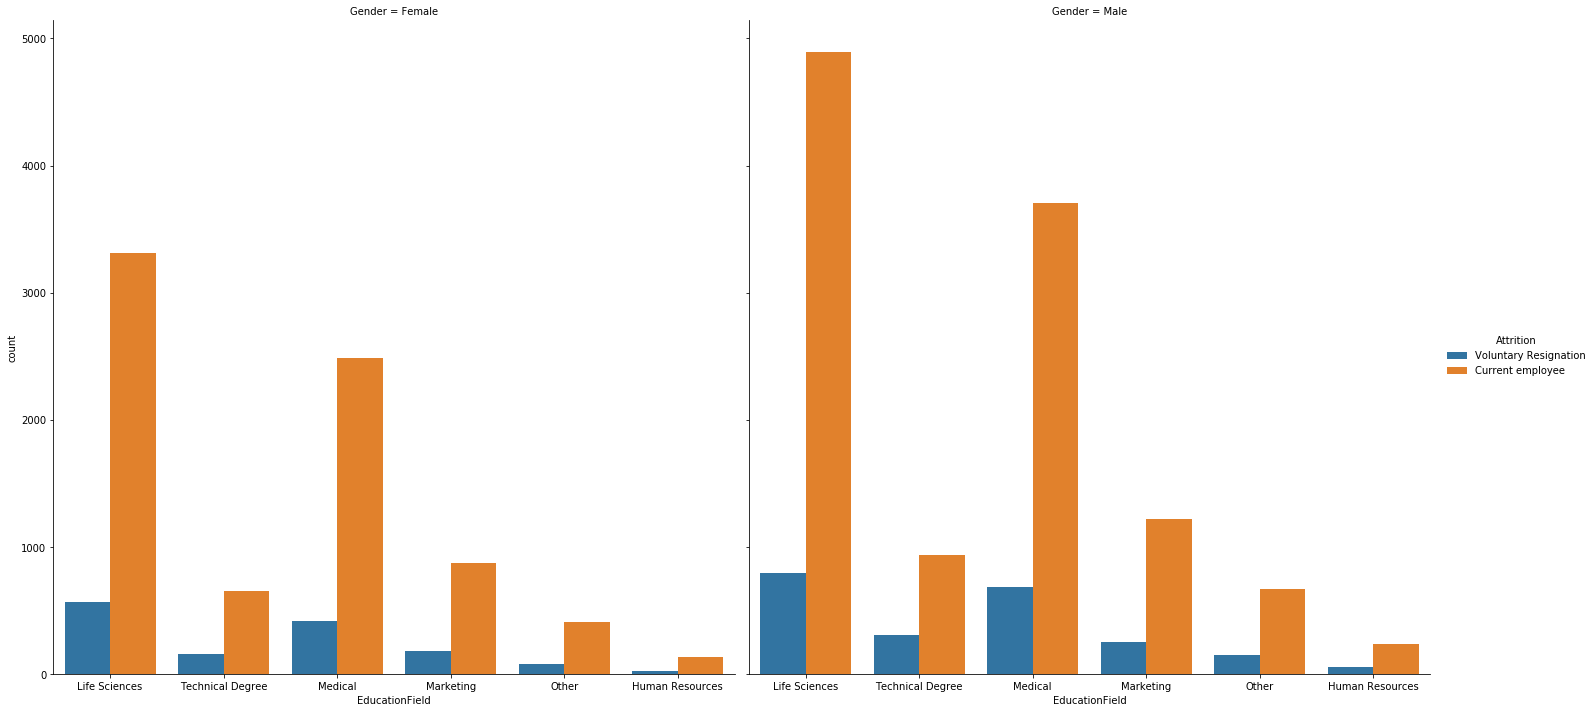

In [64]:
sns.catplot(x='EducationField',hue='Attrition',col='Gender',data=df,kind='count',height=10)

In [65]:

# Attrition rate of female in 'HR' education field is less when compared to male,
# Attrition rate of female in 'Life Sciences' and 'Medical' is more when compared to male.

# EmployeeCount

In [66]:
df['EmployeeCount'].value_counts()

1    16227
1     6963
Name: EmployeeCount, dtype: int64

# EmployeeNumber

In [67]:
df['EmployeeNumber'].value_counts()

23244    6
10442    5
6325     5
10024    4
9568     4
        ..
20561    1
17153    1
6500     1
16032    1
13903    1
Name: EmployeeNumber, Length: 23141, dtype: int64

# Application ID

In [68]:
df['Application ID'].value_counts()

128283      1
138309      1
135776      1
143216.0    1
137289      1
           ..
135806      1
137350      1
127392      1
144355      1
124480      1
Name: Application ID, Length: 23190, dtype: int64

# EnvironmentSatisfaction

In [69]:
df['EnvironmentSatisfaction'].value_counts()

3.0    7142
4.0    7038
1.0    4524
2.0    4486
Name: EnvironmentSatisfaction, dtype: int64

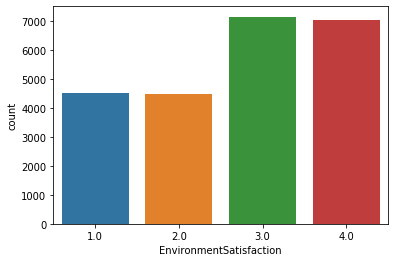

In [70]:
sns.countplot(df['EnvironmentSatisfaction'])

In [71]:

# Count of environment satisfaction is more towards 3 and 4.

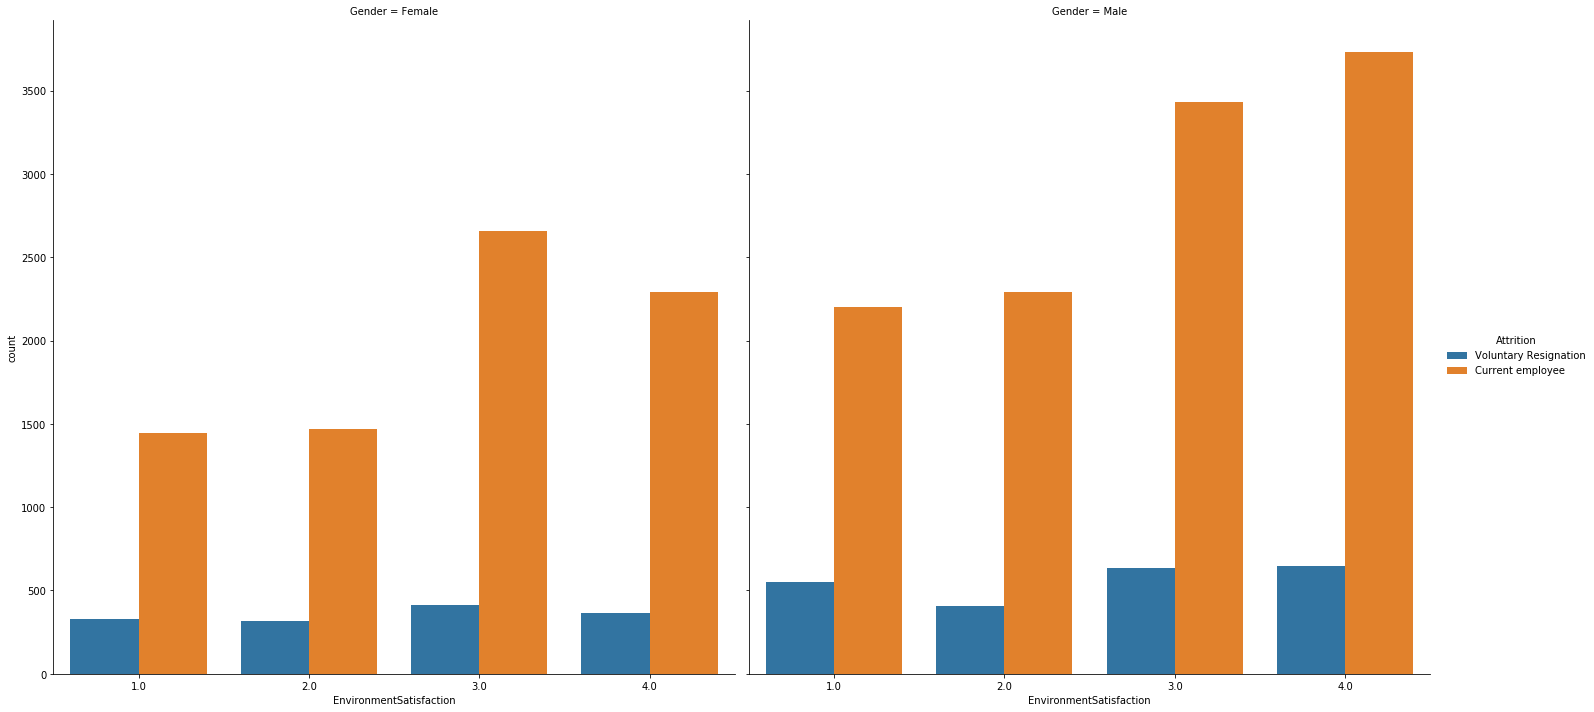

In [72]:
sns.catplot(x='EnvironmentSatisfaction',hue='Attrition',col='Gender',data=df,kind='count',height=10)

In [73]:
# For both male and female, attrition rate is high environment satisfaction is 1 and 2

# Gender

In [74]:
df['Gender'].value_counts()

Male      13907
Female     9283
Name: Gender, dtype: int64

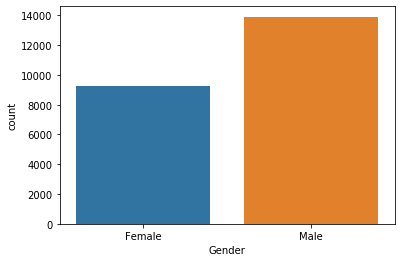

In [75]:

sns.countplot(df['Gender'])

In [76]:
# Approximately female and male ratio is 3:2

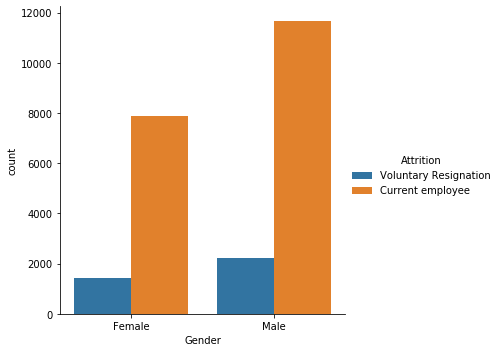

In [77]:

sns.catplot(x='Gender',hue='Attrition',kind='count',data=df,height=5)

In [78]:

# For better inference, lets calculate male and female attrition rate.

In [79]:
df.loc[(df['Gender']=='Female') & (df['Attrition']=='Voluntary Resignation')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22357,43.0,Voluntary Resignation,Travel_Frequently,807.0,Research & Development,17,3.0,Medical,1,23257,146712,4.0,Female,100,3.0,2.0,Sales Executive,3,Single,4850,23333.0,7.0,Y,No,15,3.0,3.0,80.0,0.0,8.0,3.0,3.0,5.0,3.0,0.0,1.0,Company Website
22358,43.0,Voluntary Resignation,Travel_Frequently,807.0,Research & Development,17,3.0,Technical Degree,1,23261,146716,4.0,Female,100,3.0,2.0,Sales Executive,3,Single,4850,23333.0,8.0,Y,No,15,3.0,3.0,80.0,0.0,8.0,3.0,3.0,5.0,3.0,0.0,1.0,Company Website
22359,43.0,Voluntary Resignation,Travel_Frequently,807.0,Research & Development,17,3.0,Medical,1,23262,146717,4.0,Female,100,3.0,2.0,Sales Executive,3,Single,4850,23333.0,7.0,Y,No,15,3.0,3.0,80.0,0.0,8.0,3.0,3.0,5.0,3.0,0.0,1.0,Company Website
22360,43.0,Voluntary Resignation,Travel_Frequently,807.0,Research & Development,17,3.0,Technical Degree,1,23264,146719,4.0,Female,100,3.0,2.0,Sales Executive,3,Single,4850,23333.0,8.0,Y,No,15,3.0,3.0,80.0,0.0,8.0,3.0,3.0,5.0,3.0,0.0,1.0,Company Website


In [80]:
Female_Attrition_Rate=1420/9283
Female_Attrition_Rate

0.1529677905849402

In [81]:
df.loc[(df['Gender']=='Male') & (df['Attrition']=='Voluntary Resignation')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
13,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,560,124015,1.0,Male,39,3.0,2.0,Sales Executive,2,Married,6825,21173.0,0.0,Y,No,11,3.0,4.0,80.0,1.0,10.0,2.0,3.0,9.0,7.0,4.0,2.0,Company Website
14,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,561,124016,1.0,Male,39,3.0,2.0,Sales Executive,2,Married,6825,21173.0,4.0,Y,No,11,3.0,4.0,80.0,1.0,10.0,2.0,3.0,9.0,7.0,4.0,2.0,Company Website
15,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,563,124018,1.0,Male,39,3.0,2.0,Sales Executive,2,Married,6825,21173.0,0.0,Y,No,11,3.0,4.0,80.0,1.0,10.0,2.0,3.0,9.0,7.0,4.0,2.0,Company Website
16,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,564,124019,1.0,Male,39,3.0,2.0,Sales Executive,2,Married,6825,21173.0,4.0,Y,No,11,3.0,4.0,80.0,1.0,10.0,2.0,3.0,9.0,7.0,4.0,2.0,Company Website
17,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,570,124025,1.0,Male,39,3.0,2.0,Sales Executive,2,Married,6825,21173.0,0.0,Y,No,11,3.0,4.0,80.0,1.0,10.0,2.0,3.0,9.0,7.0,4.0,2.0,Company Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22349,43.0,Voluntary Resignation,Travel_Frequently,807.0,Research & Development,17,3.0,Medical,1,20180,143635,3.0,Male,38,2.0,1.0,Research Scientist,3,Married,2437,15587.0,3.0,Y,Yes,16,3.0,4.0,80.0,1.0,6.0,4.0,3.0,1.0,0.0,0.0,0.0,GlassDoor
22350,43.0,Voluntary Resignation,Travel_Frequently,807.0,Research & Development,17,3.0,Technical Degree,1,20181,143636,3.0,Male,38,2.0,1.0,Research Scientist,3,Married,2437,15587.0,9.0,Y,Yes,16,3.0,4.0,80.0,1.0,6.0,4.0,3.0,1.0,0.0,0.0,0.0,GlassDoor
22351,43.0,Voluntary Resignation,Travel_Frequently,807.0,Research & Development,17,3.0,Medical,1,20184,143639,3.0,Male,38,2.0,1.0,Research Scientist,3,Married,2437,15587.0,3.0,Y,Yes,16,3.0,4.0,80.0,1.0,6.0,4.0,3.0,1.0,0.0,0.0,0.0,GlassDoor
22352,43.0,Voluntary Resignation,Travel_Frequently,807.0,Research & Development,17,3.0,Technical Degree,1,20187,143642,3.0,Male,38,2.0,1.0,Research Scientist,3,Married,2437,15587.0,9.0,Y,Yes,16,3.0,4.0,80.0,1.0,6.0,4.0,3.0,1.0,0.0,0.0,0.0,GlassDoor


In [82]:
Male_Attrition_Rate=2243/13907
Male_Attrition_Rate

0.16128568346875674

In [83]:
# Hence, Male attrition rate is slightly higher than Female attrition rate.

# HourlyRate

In [84]:
df['HourlyRate'].value_counts()

66    478
84    441
48    440
42    439
96    434
     ... 
69    235
68    220
53    218
38    206
34    189
Name: HourlyRate, Length: 71, dtype: int64

In [85]:
# From info we can see that HourlyRate has dtype as object, so lets convert it in integer form

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  int32  
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EmployeeCount             23190 non-null  object 
 9   EmployeeNumber            23190 non-null  object 
 10  Application ID            23190 non-null  object 
 11  EnvironmentSatisfaction   23190 non-null  float64
 12  Gender                    23190 non-null  object 
 13  HourlyRate                23190 non-null  object 
 14  JobInv

In [87]:
df['HourlyRate']=df['HourlyRate'].astype('int')

In [88]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  int32  
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EmployeeCount             23190 non-null  object 
 9   EmployeeNumber            23190 non-null  object 
 10  Application ID            23190 non-null  object 
 11  EnvironmentSatisfaction   23190 non-null  float64
 12  Gender                    23190 non-null  object 
 13  HourlyRate                23190 non-null  int32  
 14  JobInv

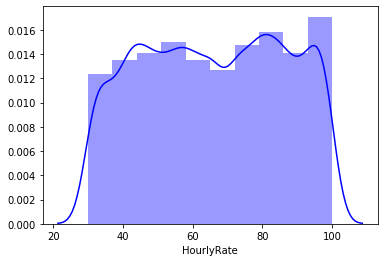

In [89]:
sns.distplot(df['HourlyRate'],color='b',bins=10)

In [90]:

df['HourlyRate'].mean()

65.85774040534713

In [91]:

df['HourlyRate'].min()

30

In [92]:

df['HourlyRate'].max()

100

In [93]:
# Avg hourly rate is around 65 and min hourly rate is 65 and max hourly rate is 100


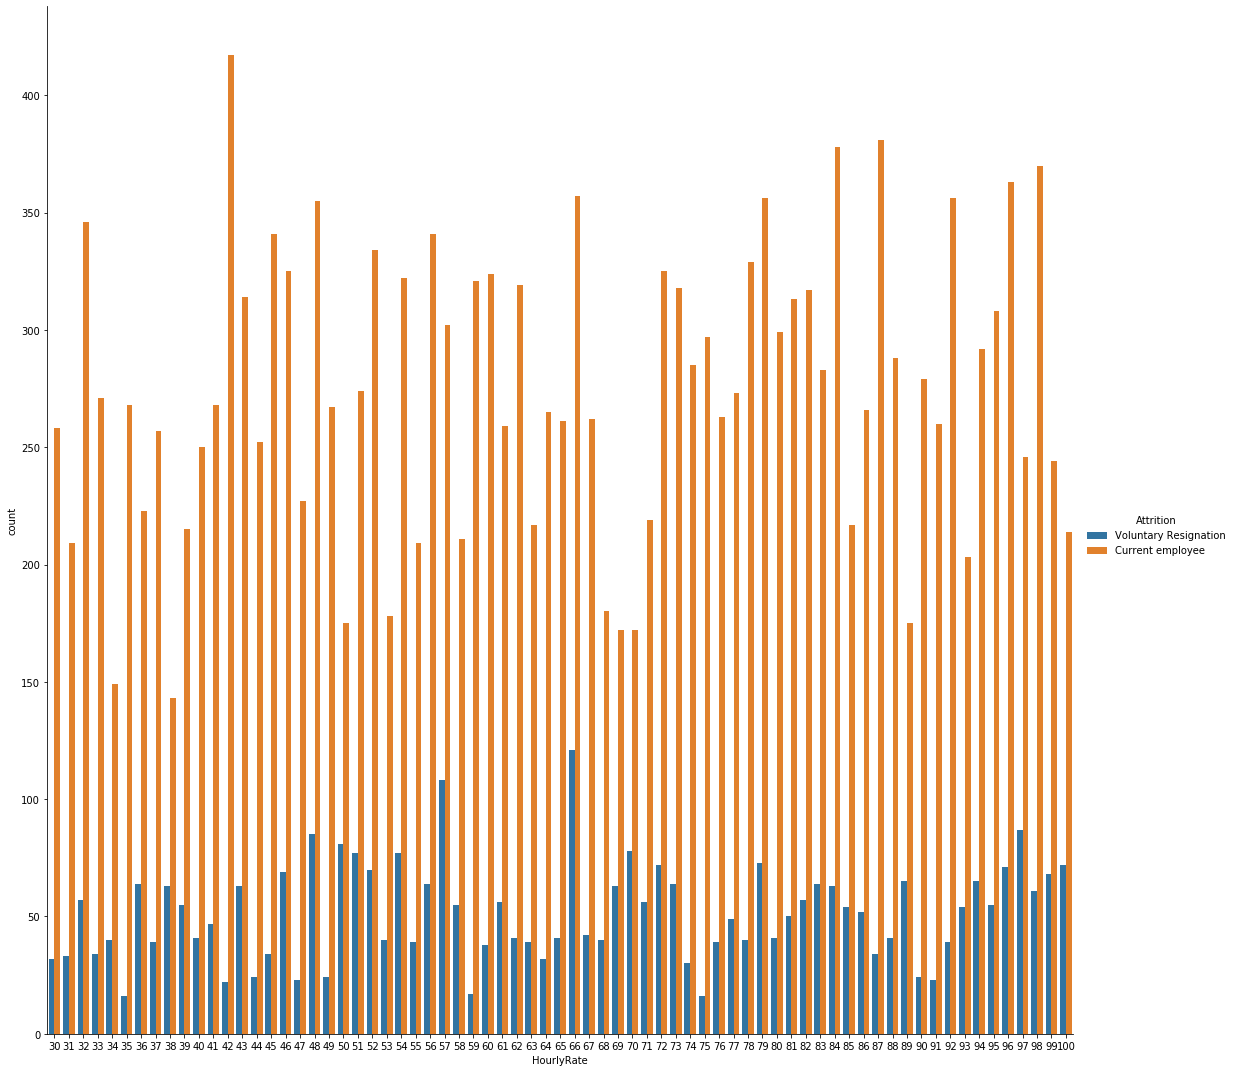

In [94]:

sns.catplot(x='HourlyRate',hue='Attrition',kind='count',data=df,height=15,aspect=1)

In [95]:
# There is no clear evidence that HourlyRate has any impact on attrition of employees.

# JobInvolvement

In [96]:
df['JobInvolvement'].value_counts()

3.0    13723
2.0     5903
4.0     2261
1.0     1303
Name: JobInvolvement, dtype: int64

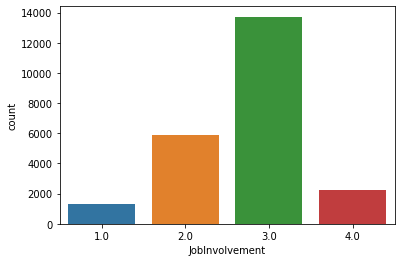

In [97]:
sns.countplot(df['JobInvolvement'])

In [98]:

# Majority of employees lie in the job involvement 2 and 3

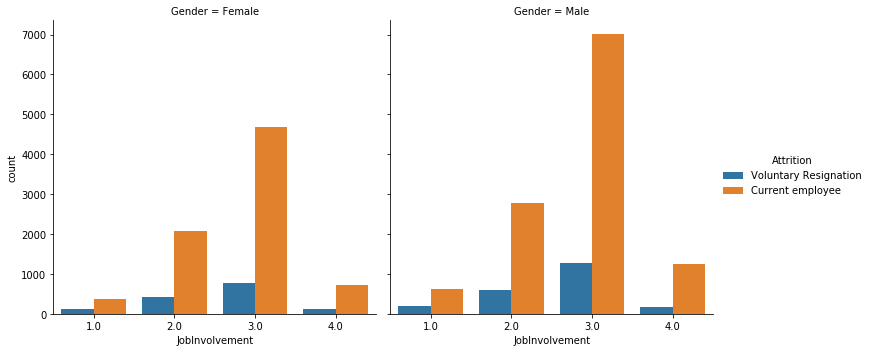

In [99]:
sns.catplot(x='JobInvolvement',hue='Attrition',col='Gender',data=df,kind='count')

In [100]:
# Job involvement 3 has slighly more attrition rate than others.

# JobLevel

In [101]:
df['JobLevel'].value_counts()

1.0    8542
2.0    8438
3.0    3445
4.0    1682
5.0    1083
Name: JobLevel, dtype: int64

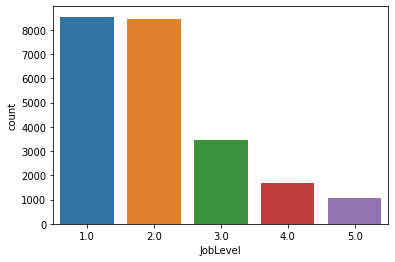

In [102]:
sns.countplot(df['JobLevel'])

In [103]:
# Majority of employees lie in the job level 1 and 2

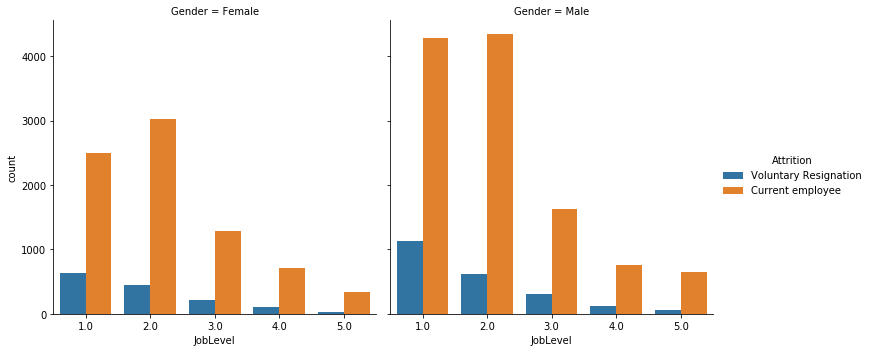

In [104]:
sns.catplot(x='JobLevel',hue='Attrition',col='Gender',data=df,kind='count')

In [105]:
# Attrition rate is higher in job level 1 and 2.

# JobRole

In [106]:

df['JobRole'].value_counts()

Sales Executive              5057
Research Scientist           4592
Laboratory Technician        4100
Manufacturing Director       2361
Healthcare Representative    2077
Manager                      1585
Sales Representative         1299
Research Director            1281
Human Resources               838
Name: JobRole, dtype: int64

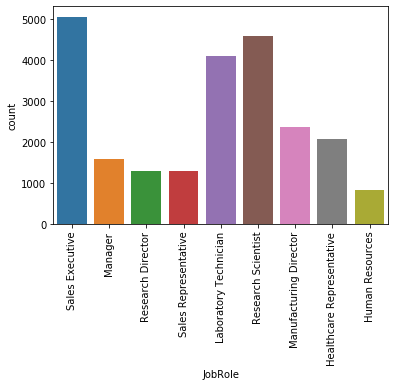

In [107]:
plt.xticks(rotation='vertical')
sns.countplot(df['JobRole'])

In [108]:
# Count of employees is more in job role as Sales Executive,Laboratory Technician,Research Scientist

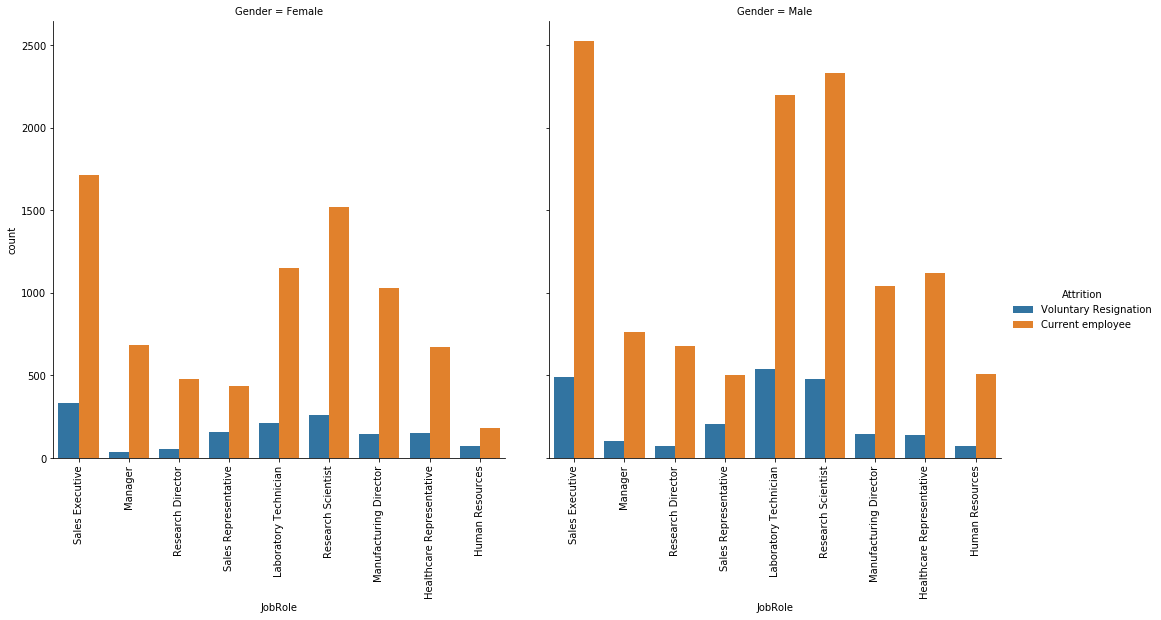

In [109]:
g=sns.catplot(x='JobRole',hue='Attrition',col='Gender',data=df,kind='count',height=7)
g.set_xticklabels(rotation=90)

In [110]:
# Job role as Sales Representative has the highest attrition rate for both male and female,
# Job role as HR has high rate of attrition in case of female gender.


# JobSatisfaction

In [111]:
df['JobSatisfaction'].value_counts()

4    7209
3    7019
1    4560
2    4402
Name: JobSatisfaction, dtype: int64

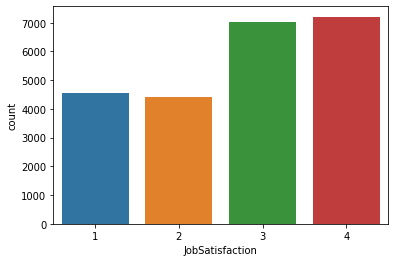

In [112]:
sns.countplot(df['JobSatisfaction'])

In [113]:
# Job Satisfaction count for 3 and 4 are more than 1 and 2.

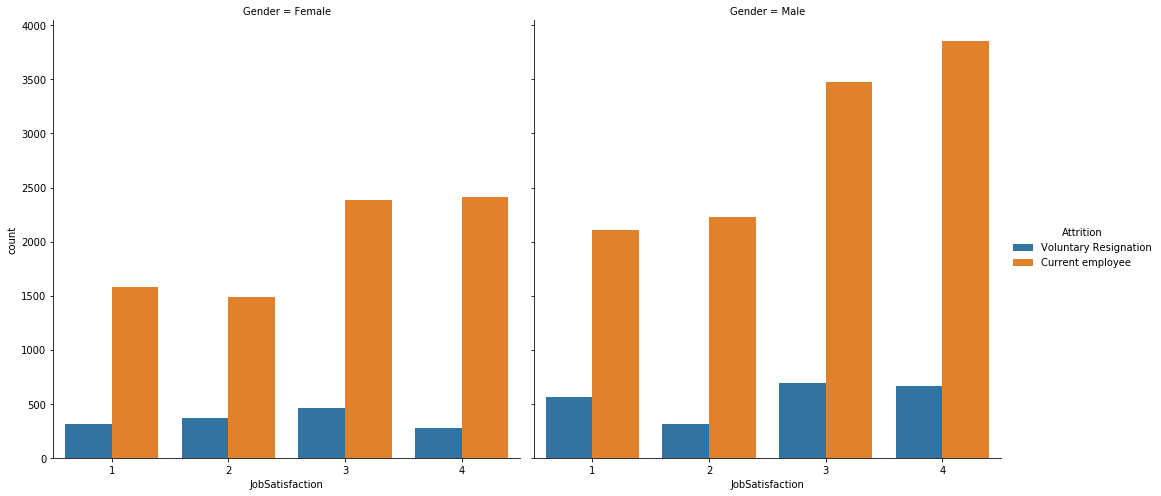

In [114]:

sns.catplot(x='JobSatisfaction',hue='Attrition',col='Gender',data=df,kind='count',height=7)

In [115]:

# Higher attrition rate can be seen in Job Satisfaction level 1 and 2.

# MaritalStatus

In [116]:
df['MaritalStatus'].value_counts()

Married     10613
Single       7411
Divorced     5166
Name: MaritalStatus, dtype: int64

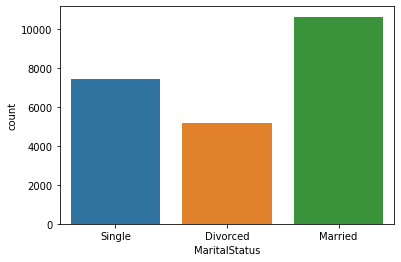

In [117]:

sns.countplot(df['MaritalStatus'])

In [118]:

# Count of married employees is more

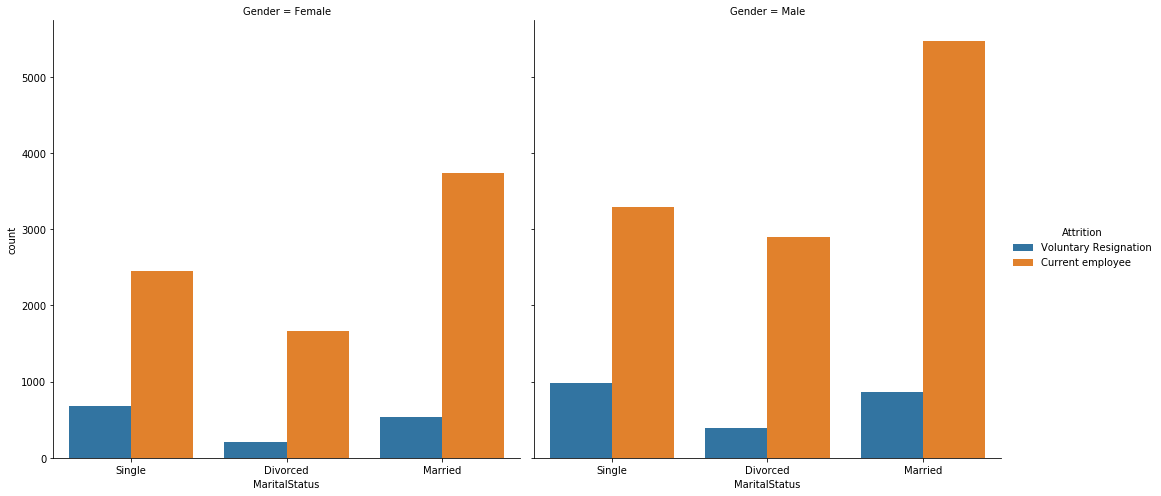

In [119]:
sns.catplot(x='MaritalStatus',hue='Attrition',col='Gender',data=df,kind='count',height=7)

In [120]:
# Attrition rate in singles are higher for both male and female

# MonthlyIncome

In [121]:
df['MonthlyIncome'].value_counts()

2342     66
2559     54
2741     48
2610     48
5562     48
         ..
2018      8
19658     8
7260      8
9991      8
4559      7
Name: MonthlyIncome, Length: 1349, dtype: int64

In [122]:
# As,monthly income column has object dtype, we need to convert it in integer form.

In [123]:

df['MonthlyIncome']=df['MonthlyIncome'].astype('int')


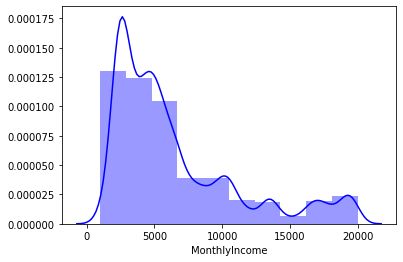

In [124]:

sns.distplot(df['MonthlyIncome'],bins=10,color='b')

In [125]:
df['MonthlyIncome'].mean()

6507.905519620526

In [126]:
df['MonthlyIncome'].min()

1009

In [127]:
df['MonthlyIncome'].max()

19999

In [128]:
 #Minimum monthly income of employees is 1009 and maximum monthly income of employees is 19999 and avg monthly income of employees is 6507.
# Majority of employees are having monthly income lower than 5000

# MonthlyRate

In [129]:
df['MonthlyRate'].value_counts()

9150.0     53
4223.0     48
19373.0    34
6319.0     32
11737.0    32
           ..
18779.0     8
21457.0     8
5220.0      8
24788.0     7
26376.0     5
Name: MonthlyRate, Length: 1427, dtype: int64

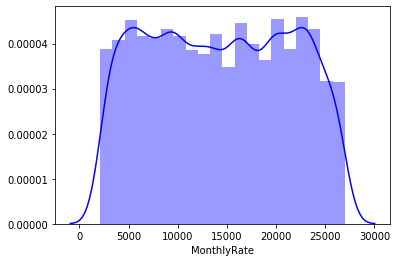

In [130]:

sns.distplot(df['MonthlyRate'],20,color='b')

In [131]:
df['MonthlyRate'].mean()

14302.076757222942

In [132]:
df['MonthlyRate'].min()

2094.0

In [133]:
df['MonthlyRate'].max()

26999.0

In [134]:
# Avg monthly rate of employees is around 14302,min monthly rate is 2094 and max monthly rate is 26999.


# NumCompaniesWorked

In [135]:
df['NumCompaniesWorked'].value_counts()

1.0    8209
0.0    3144
3.0    2493
2.0    2303
4.0    2181
7.0    1167
6.0    1104
5.0     994
9.0     810
8.0     785
Name: NumCompaniesWorked, dtype: int64

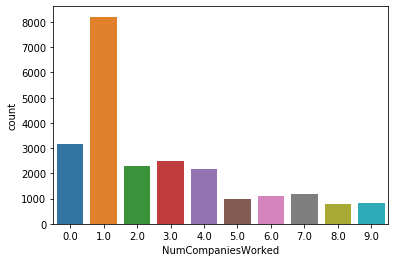

In [136]:
sns.countplot(df['NumCompaniesWorked'])

In [137]:
# Maximum employees have worked in only 1 company.

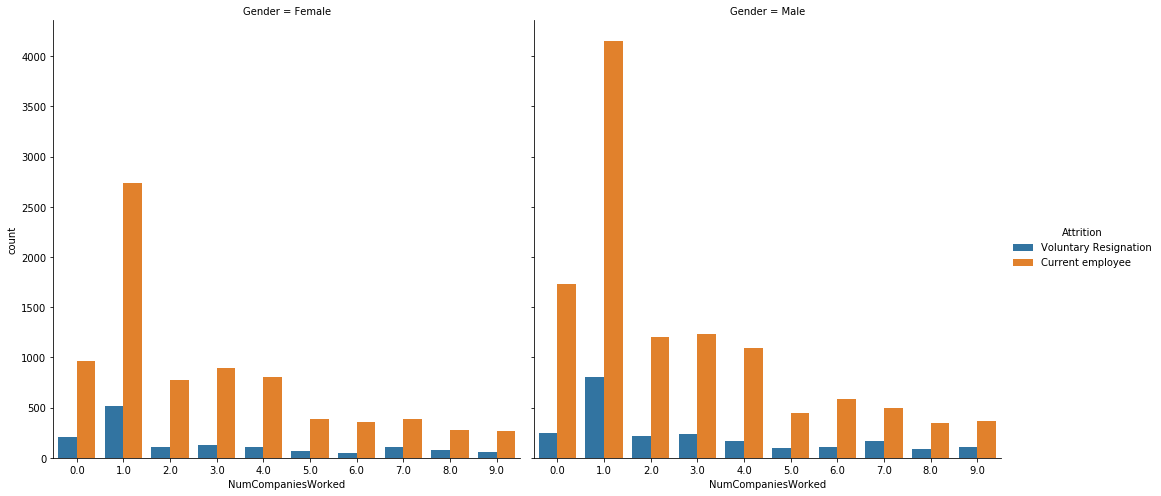

In [138]:
sns.catplot(x='NumCompaniesWorked',hue='Attrition',col='Gender',data=df,kind='count',height=7)


In [139]:
# It can be observed that employees who have worked in 1 company have higher attrition rate


# Over18

In [140]:

df['Over18'].value_counts()

Y    23190
Name: Over18, dtype: int64

# OverTime

In [141]:
df['OverTime'].value_counts()

No     16626
Yes     6564
Name: OverTime, dtype: int64

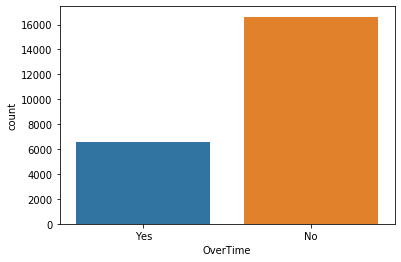

In [142]:

sns.countplot(df['OverTime'])

In [143]:
# Approximately ratio of employees doing overtime and employees not doing overtime is 30:70

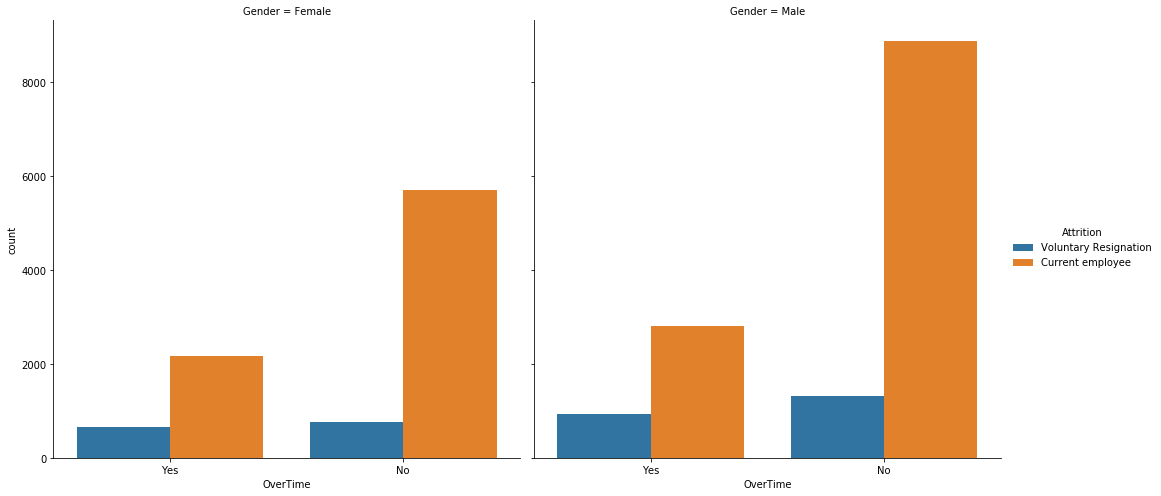

In [144]:
sns.catplot(x='OverTime',hue='Attrition',col='Gender',data=df,kind='count',height=7)

In [145]:
  #A very high attrition rate is seen in employees who are doing overtime for both male and female.

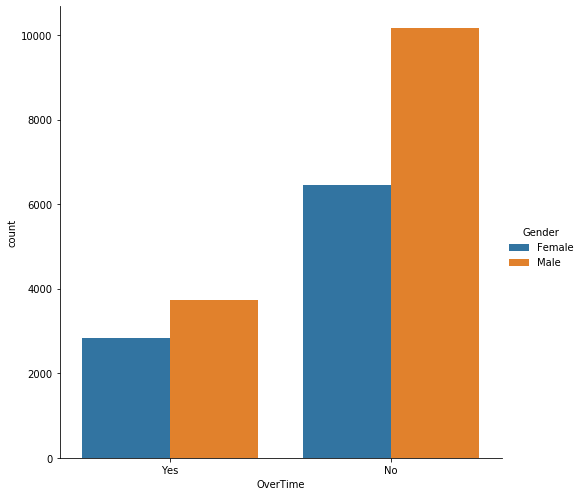

In [146]:
sns.catplot(x='OverTime',hue='Gender',data=df,kind='count',height=7)

In [147]:
# Male has a higher attrition rate in both cases

# PercentSalaryHike

In [148]:
df['PercentSalaryHike'].value_counts()

13    3317
11    3316
14    3180
12    3086
15    1578
18    1400
17    1302
16    1235
19    1203
22     883
20     864
21     765
23     443
24     338
25     280
Name: PercentSalaryHike, dtype: int64

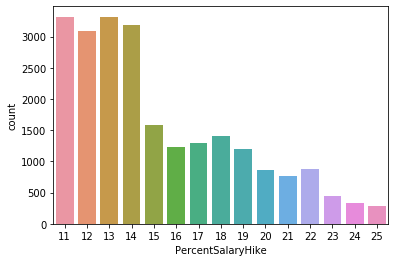

In [149]:
sns.countplot(df['PercentSalaryHike'])

In [150]:
# Majority of employees got a salary hike less than 15%


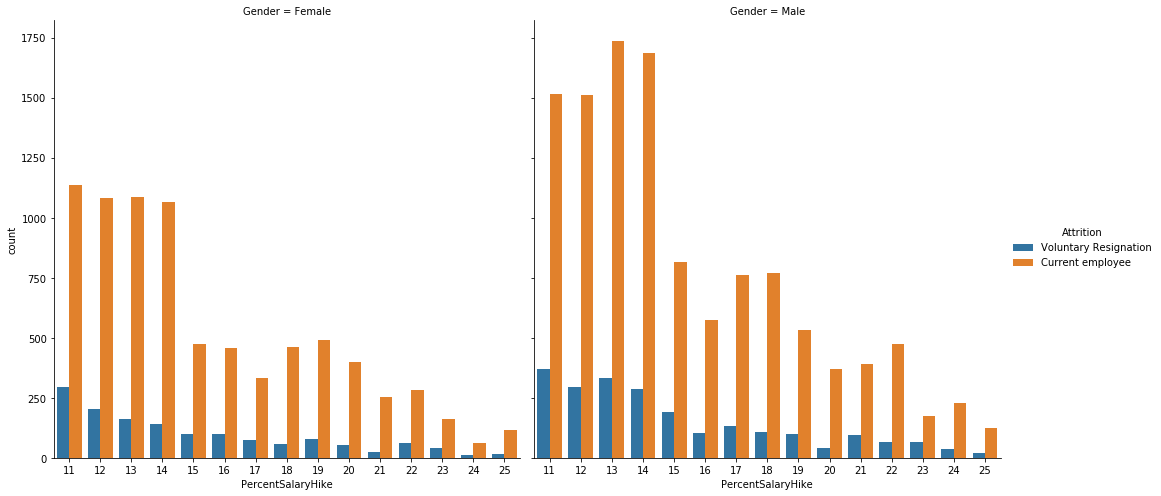

In [151]:
sns.catplot(x='PercentSalaryHike',hue='Attrition',col='Gender',data=df,kind='count',height=7)


In [152]:
# Higher attrition is observed in cases where the salary hike is less than 16% for male when compared to female.


# PerformanceRating

In [153]:
df['PerformanceRating'].value_counts()

3.0    19590
4.0     3600
Name: PerformanceRating, dtype: int64

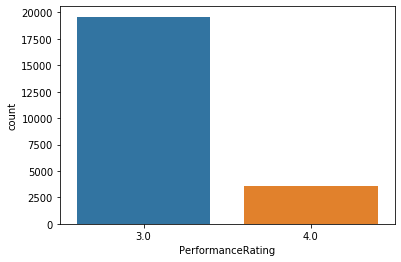

In [154]:
sns.countplot(df['PerformanceRating'])

In [155]:
# There are very few employees who have performance rating 4.

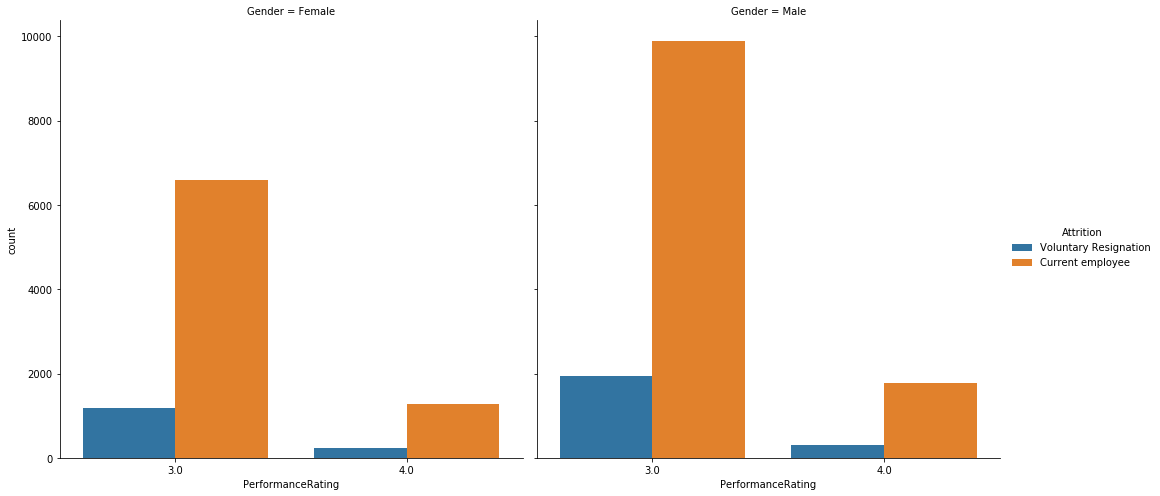

In [156]:
sns.catplot(x='PerformanceRating',hue='Attrition',col='Gender',data=df,kind='count',height=7)


In [157]:
# Performance Rating 3 has higher rate of attrition for both male and female.


# RelationshipSatisfaction

In [158]:
df['RelationshipSatisfaction'].value_counts()

3.0    7216
4.0    6834
2.0    4802
1.0    4338
Name: RelationshipSatisfaction, dtype: int64

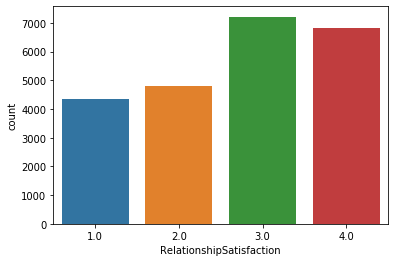

In [159]:
sns.countplot(df['RelationshipSatisfaction'])

In [160]:
# Count of employees having relationship satisfaction 3,4 are more than 1,2

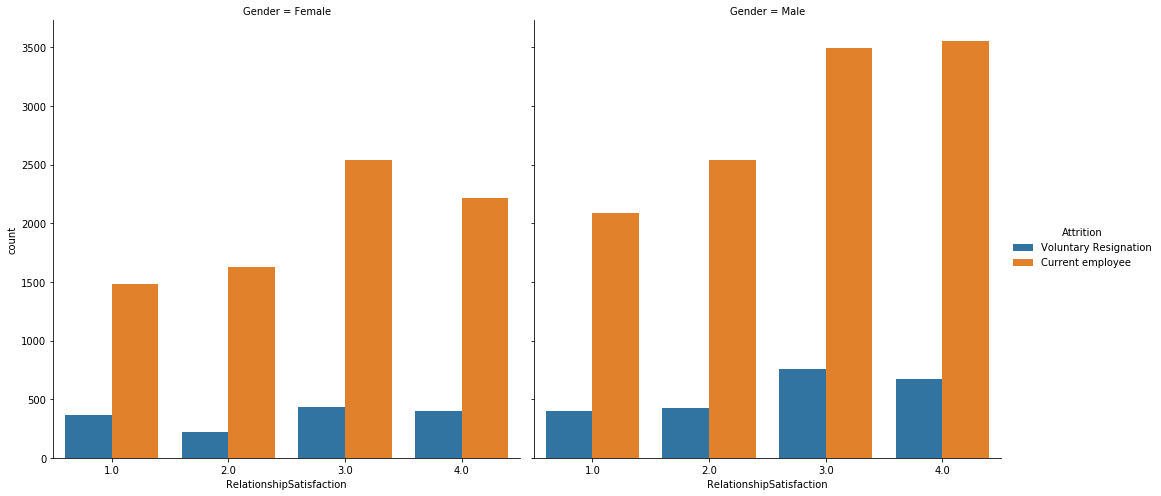

In [161]:
sns.catplot(x='RelationshipSatisfaction',hue='Attrition',col='Gender',data=df,kind='count',height=7)


In [162]:
# Higher attrition is observed in lower relationship satisfaction for both genders


# StandardHours

In [163]:
df['StandardHours'].value_counts()

80.0    23190
Name: StandardHours, dtype: int64

# StockOptionLevel

In [164]:
df['StockOptionLevel'].value_counts()

0.0    9938
1.0    9407
2.0    2519
3.0    1326
Name: StockOptionLevel, dtype: int64

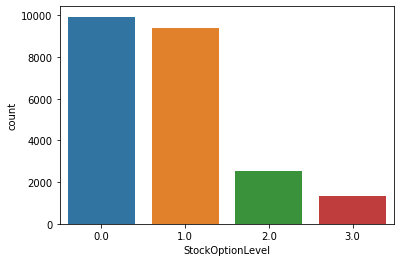

In [165]:
sns.countplot(df['StockOptionLevel'])

In [166]:
# There are many employees who does not have stock options level,
# As the stock options level increases the count of employees reduces.


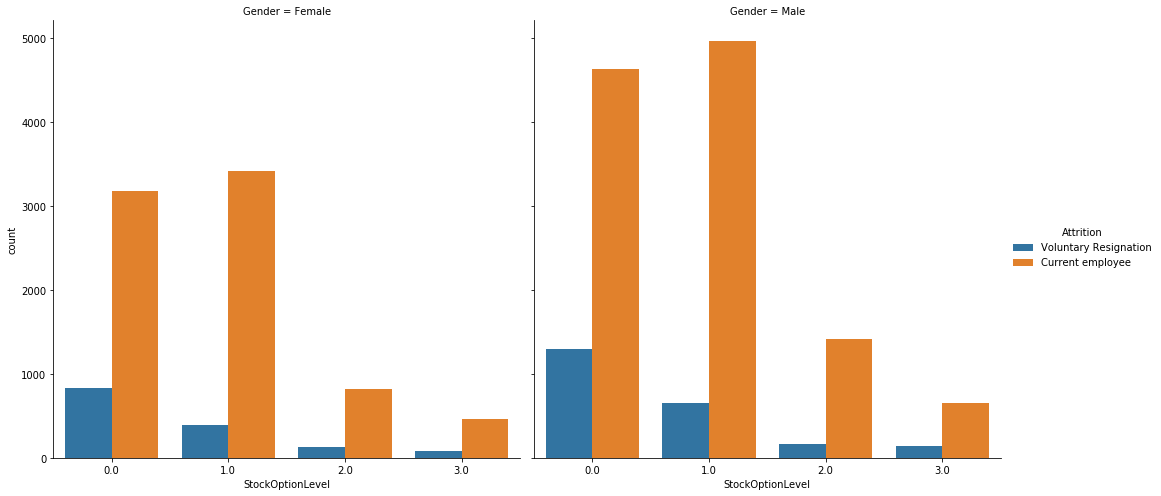

In [167]:
sns.catplot(x='StockOptionLevel',hue='Attrition',col='Gender',data=df,kind='count',height=7)


In [168]:
# Higher attrition rate is observed in lower stock options level for both genders.


# TotalWorkingYears

In [169]:
df['TotalWorkingYears'].value_counts()

10.0    3214
6.0     1970
8.0     1626
9.0     1525
5.0     1381
7.0     1274
1.0     1264
4.0      978
12.0     751
3.0      665
15.0     617
16.0     610
11.0     567
13.0     566
21.0     536
17.0     511
14.0     486
2.0      482
20.0     476
18.0     423
23.0     352
19.0     349
22.0     327
24.0     286
26.0     221
28.0     220
25.0     219
0.0      202
29.0     159
32.0     148
31.0     146
33.0     110
27.0     104
30.0     103
36.0      90
34.0      81
37.0      55
35.0      45
40.0      35
38.0      16
Name: TotalWorkingYears, dtype: int64

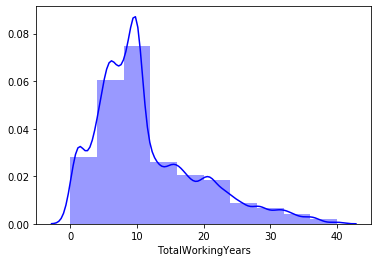

In [170]:
sns.distplot(df['TotalWorkingYears'],bins=10,color='b')

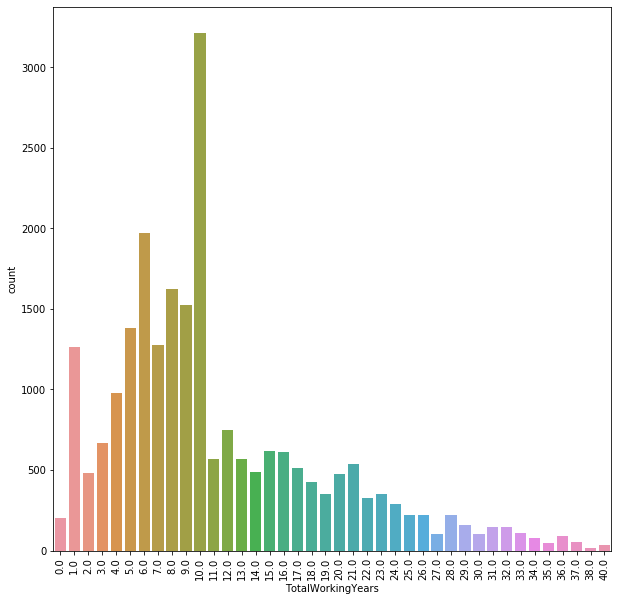

In [171]:
plt.figure(figsize=(10,10))
plt.xticks(rotation='vertical')
sns.countplot(df['TotalWorkingYears'])

In [172]:
# Maximum number of employees have total working years as 10 and the count decreases gradually after 10 years.


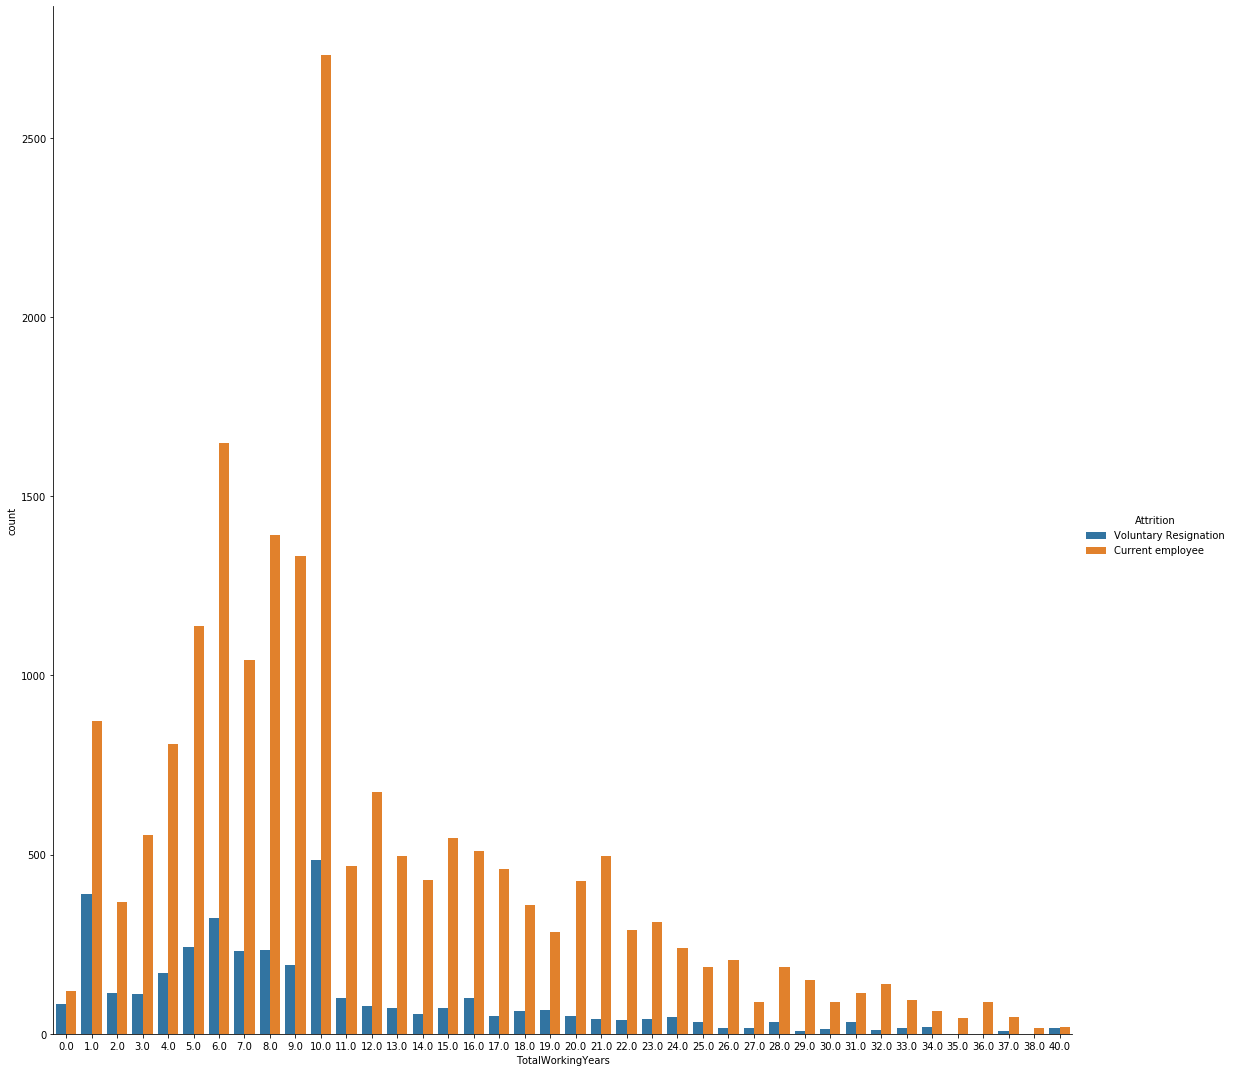

In [173]:
sns.catplot(x='TotalWorkingYears',hue='Attrition',data=df,kind='count',height=15)


In [174]:
# Higher attrition rate is observed for employees having total working years less than 10 years.


# TrainingTimesLastYear


In [175]:
df['TrainingTimesLastYear'].value_counts()


2.0    8641
3.0    7729
4.0    1949
5.0    1861
1.0    1120
6.0    1036
0.0     854
Name: TrainingTimesLastYear, dtype: int64

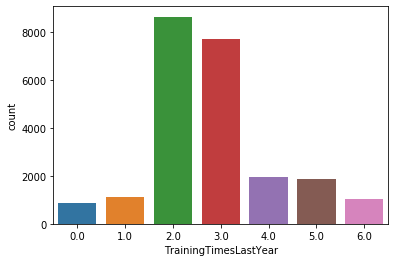

In [176]:
sns.countplot(df['TrainingTimesLastYear'])


In [177]:
# Maximum employees where trained 2 to 3 times since last year


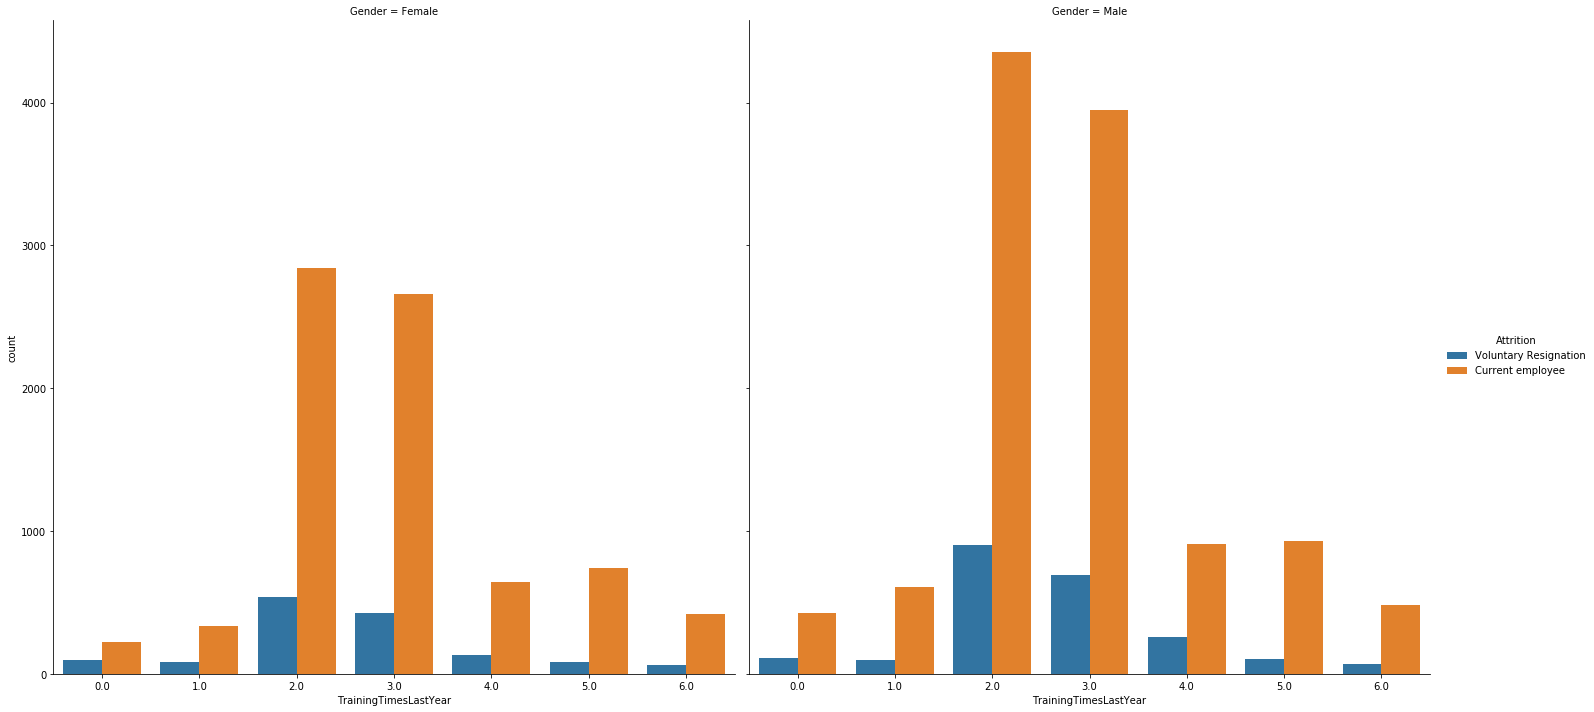

In [178]:
sns.catplot(x='TrainingTimesLastYear',hue='Attrition',col='Gender',data=df,kind='count',height=10)


In [179]:
# Higher attrition rate can be seen where number of trainings given to employees are less for both gender.


# WorkLifeBalance


In [180]:
df['WorkLifeBalance'].value_counts()


3.0    14099
2.0     5428
4.0     2409
1.0     1254
Name: WorkLifeBalance, dtype: int64

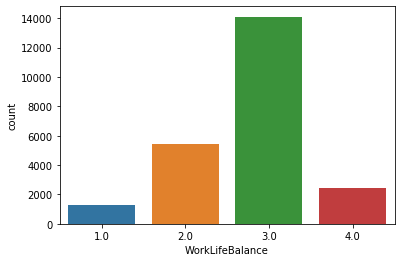

In [181]:
sns.countplot(df['WorkLifeBalance'])


In [182]:
# Count of employees having worklife balance as 3 is more wrt others


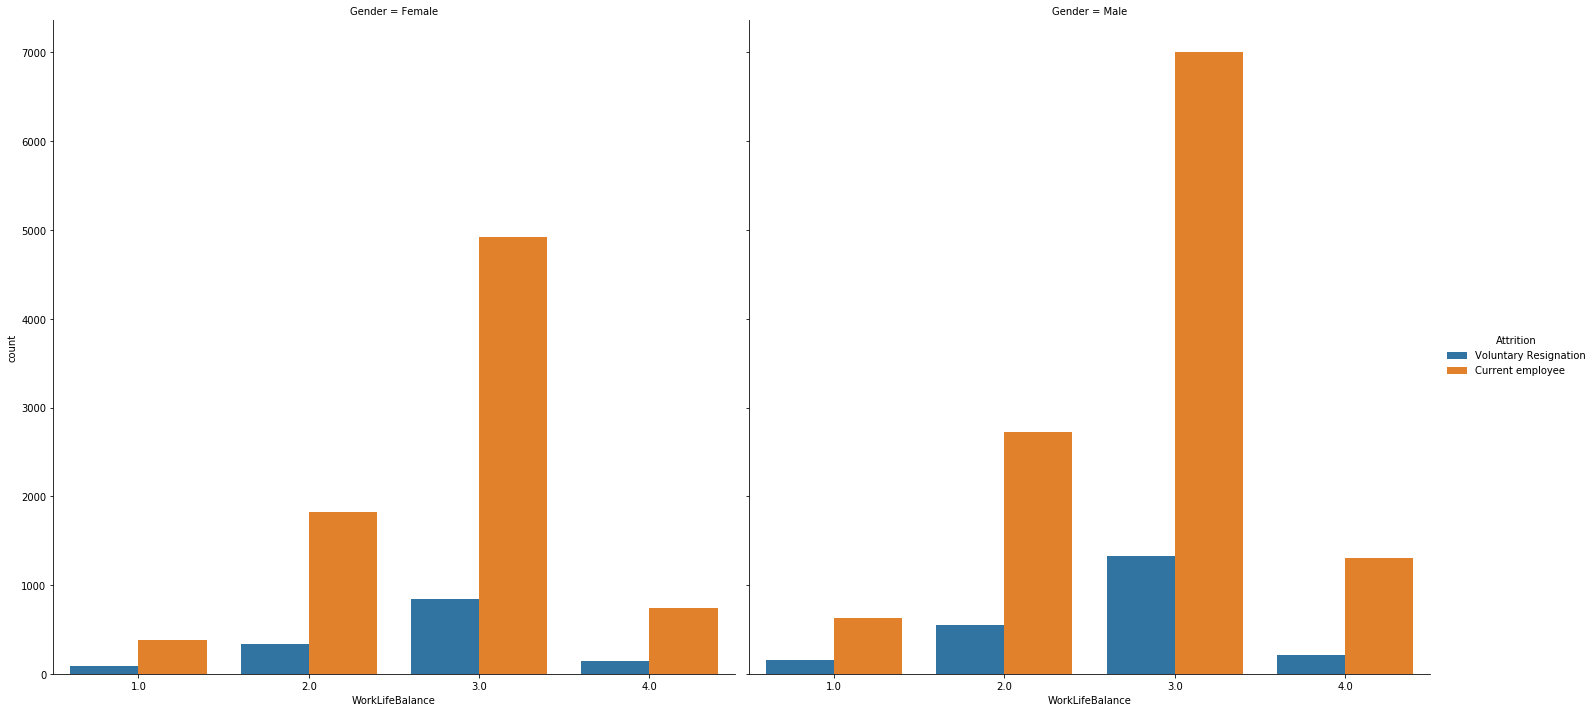

In [183]:
sns.catplot(x='WorkLifeBalance',hue='Attrition',col='Gender',data=df,kind='count',height=10)


In [184]:
# Lower work life balance has somewhat high rate of attrition


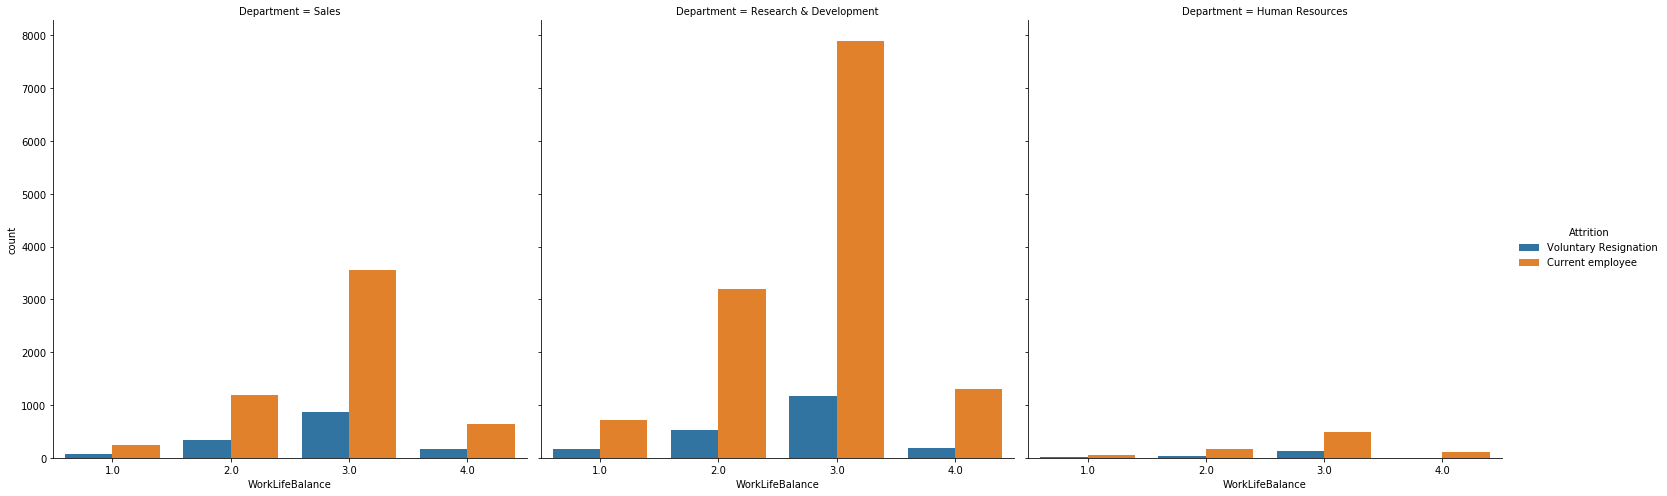

In [185]:
sns.catplot(x='WorkLifeBalance',hue='Attrition',col='Department',data=df,kind='count',height=7)


In [186]:
# HR Department has less attrition rate in any cases of work life balance


# YearsAtCompany¶


In [187]:
df['YearsAtCompany'].value_counts()


5.0     3084
1.0     2687
3.0     2005
2.0     1993
10.0    1913
4.0     1736
7.0     1405
9.0     1286
8.0     1259
6.0     1200
0.0      726
11.0     509
20.0     434
13.0     366
15.0     309
14.0     303
22.0     237
12.0     218
21.0     217
18.0     203
16.0     196
19.0     174
17.0     142
24.0      95
33.0      84
26.0      64
25.0      64
32.0      48
31.0      48
23.0      32
27.0      31
29.0      30
36.0      30
37.0      16
34.0      16
40.0      15
30.0      15
Name: YearsAtCompany, dtype: int64

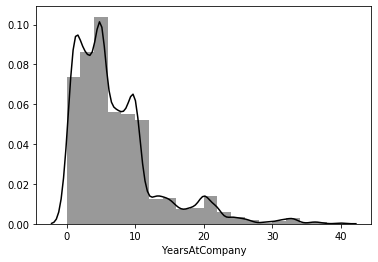

In [188]:
sns.distplot(df['YearsAtCompany'],bins=20,color='k')


In [189]:
# Count of employees is maximum who have worked less than 8 years


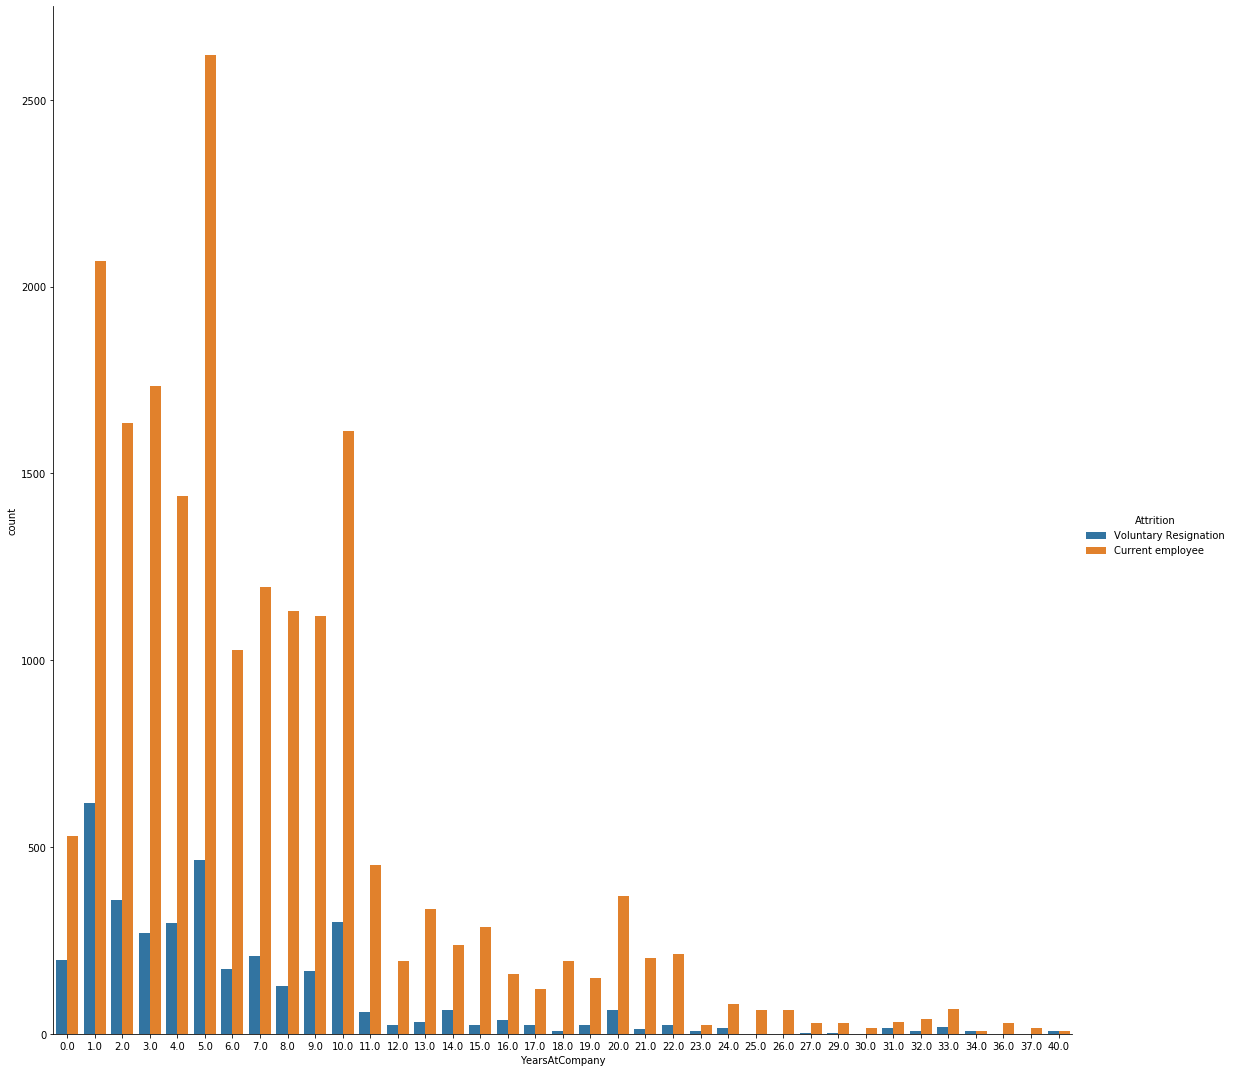

In [190]:
sns.catplot(x='YearsAtCompany',hue='Attrition',data=df,kind='count',height=15)


In [191]:
# We can see higher attrition rate for those employees who have worked for less than 10 years


# YearsInCurrentRole


In [192]:
df['YearsInCurrentRole'].value_counts()


2.0     5878
0.0     3877
7.0     3488
3.0     2121
4.0     1611
8.0     1415
9.0     1063
1.0      875
6.0      589
5.0      585
10.0     452
11.0     358
13.0     218
14.0     174
12.0     148
15.0     133
16.0     110
17.0      63
18.0      32
Name: YearsInCurrentRole, dtype: int64

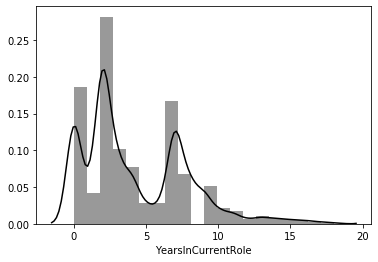

In [193]:
sns.distplot(df['YearsInCurrentRole'],bins=20,color='k')


In [194]:
# Count of employees having 2 to 3 years in current role are more.


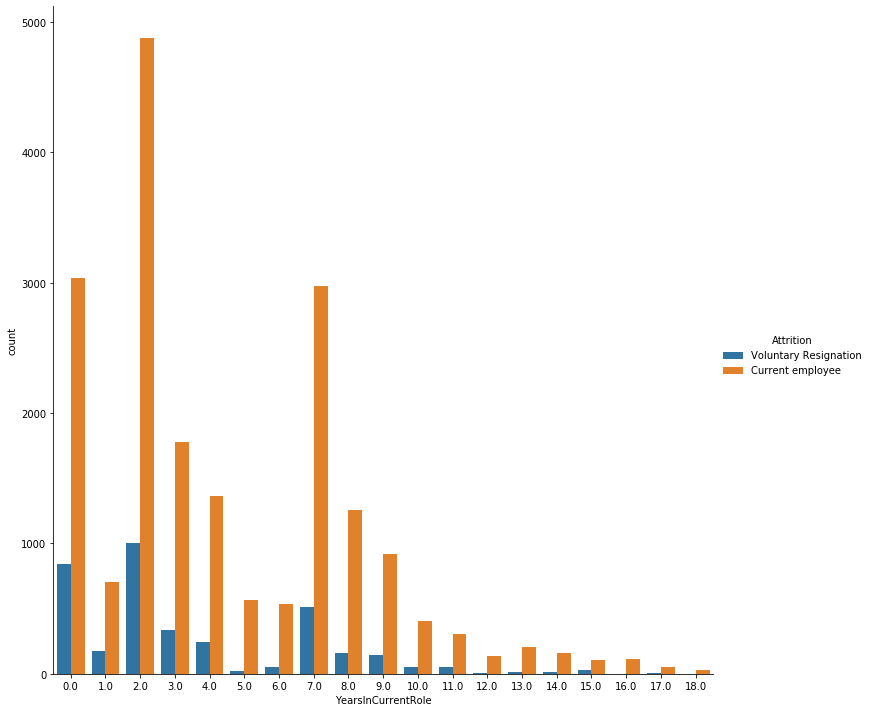

In [195]:
sns.catplot(x='YearsInCurrentRole',hue='Attrition',data=df,kind='count',height=10)


In [196]:
# After 5 years in same role,attrition rate gradually decreases with increase in years.


In [197]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  int32  
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EmployeeCount             23190 non-null  object 
 9   EmployeeNumber            23190 non-null  object 
 10  Application ID            23190 non-null  object 
 11  EnvironmentSatisfaction   23190 non-null  float64
 12  Gender                    23190 non-null  object 
 13  HourlyRate                23190 non-null  int32  
 14  JobInv

# YearsSinceLastPromotion¶


In [198]:
df['YearsSinceLastPromotion'].value_counts()


0.0     9178
1.0     5624
2.0     2514
7.0     1206
4.0      954
3.0      835
5.0      703
6.0      501
11.0     374
8.0      281
9.0      266
15.0     204
13.0     157
12.0     155
14.0     143
10.0      95
Name: YearsSinceLastPromotion, dtype: int64

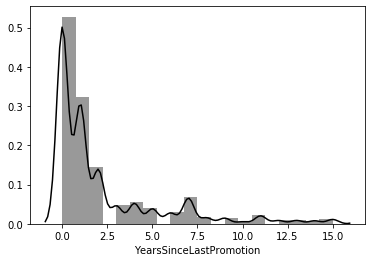

In [199]:
sns.distplot(df['YearsSinceLastPromotion'],bins=20,color='k')


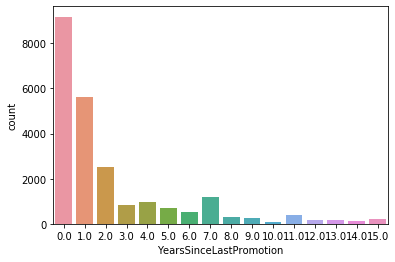

In [200]:
sns.countplot(df['YearsSinceLastPromotion'])


In [201]:
# Majority of employees are in the category of having 0,1 or 2 years since last promotion.


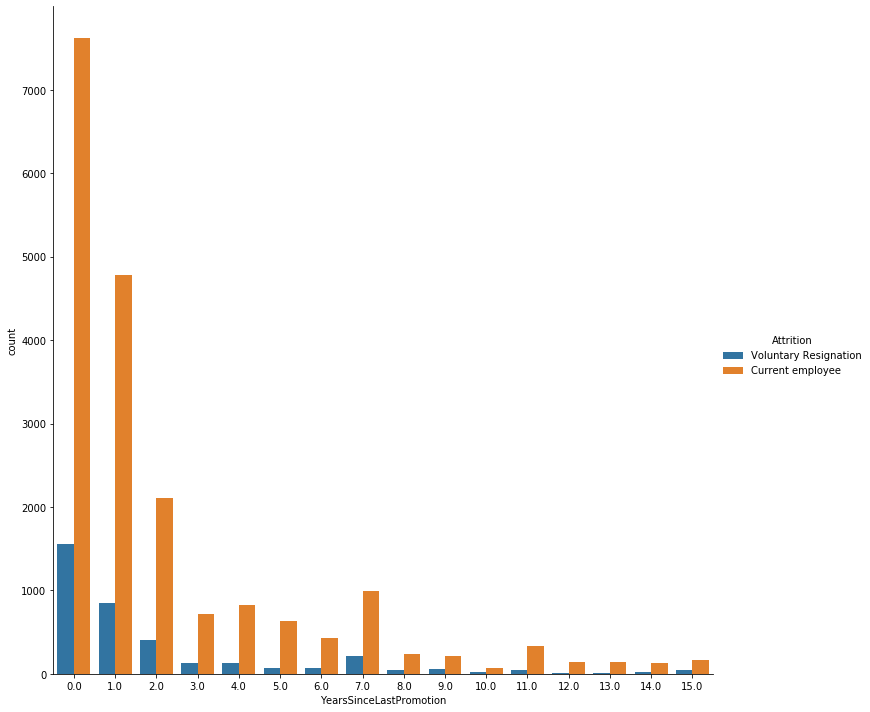

In [202]:
sns.catplot(x='YearsSinceLastPromotion',hue='Attrition',data=df,kind='count',height=10)


In [203]:
# Attrition rate is higher where Years since last promotion is less than 7


# YearsWithCurrManager


In [204]:
df['YearsWithCurrManager'].value_counts()


2.0     5410
0.0     4151
7.0     3413
3.0     2230
8.0     1683
4.0     1550
1.0     1199
9.0     1032
5.0      487
6.0      454
10.0     429
11.0     346
12.0     274
13.0     233
17.0     112
14.0      78
15.0      78
16.0      31
Name: YearsWithCurrManager, dtype: int64

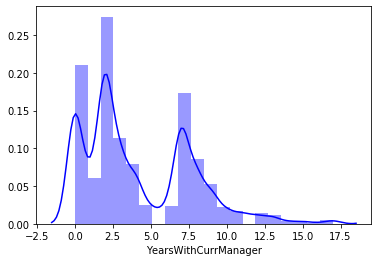

In [205]:
sns.distplot(df['YearsWithCurrManager'],bins=20,color='b')


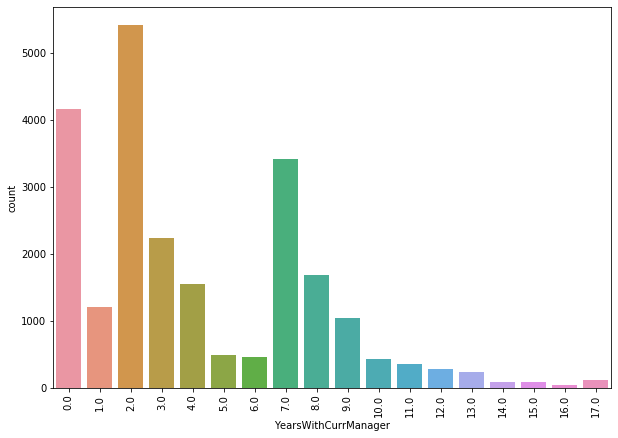

In [206]:
plt.figure(figsize=(10,7))
plt.xticks(rotation='vertical')
sns.countplot(df['YearsWithCurrManager'])

In [207]:
# Majority of employees areworking with their manager for around 2 years.


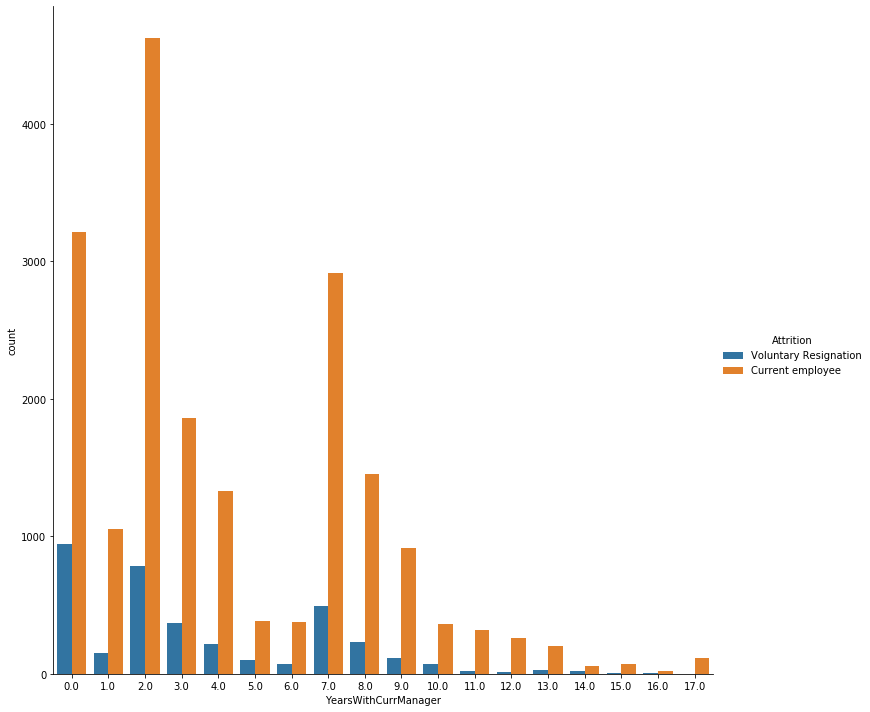

In [208]:
sns.catplot(x='YearsWithCurrManager',hue='Attrition',data=df,kind='count',height=10)


In [209]:
# As the employees work for more years with same manager,they get mentally attached with that manager and have a good comfort zone.
# Hence, they get retained for a longer period of time.
# But there are a few exceptions where the attrition rate is high even if the years are more.This maybe due to internal disputes.So,regular counselling should be done.

# Employee Source


In [210]:
df['Employee Source'].value_counts()


Company Website    5355
Seek               3641
Indeed             2507
Jora               2397
LinkedIn           2314
Recruit.net        2306
GlassDoor          2157
Adzuna             2103
Referral            409
Test                  1
Name: Employee Source, dtype: int64

In [211]:
# Since there is only 1 entry in Test,we will simply shift in other group


In [212]:
df.loc[df['Employee Source']=='Test','Employee Source']='Company Website'


In [213]:
df['Employee Source'].value_counts()


Company Website    5356
Seek               3641
Indeed             2507
Jora               2397
LinkedIn           2314
Recruit.net        2306
GlassDoor          2157
Adzuna             2103
Referral            409
Name: Employee Source, dtype: int64

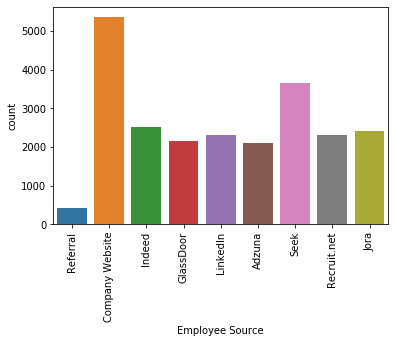

In [214]:
plt.xticks(rotation='vertical')
sns.countplot(df['Employee Source'])

In [215]:
# Around 25% employee source is Company Website, so we should management to emhance its worth more.


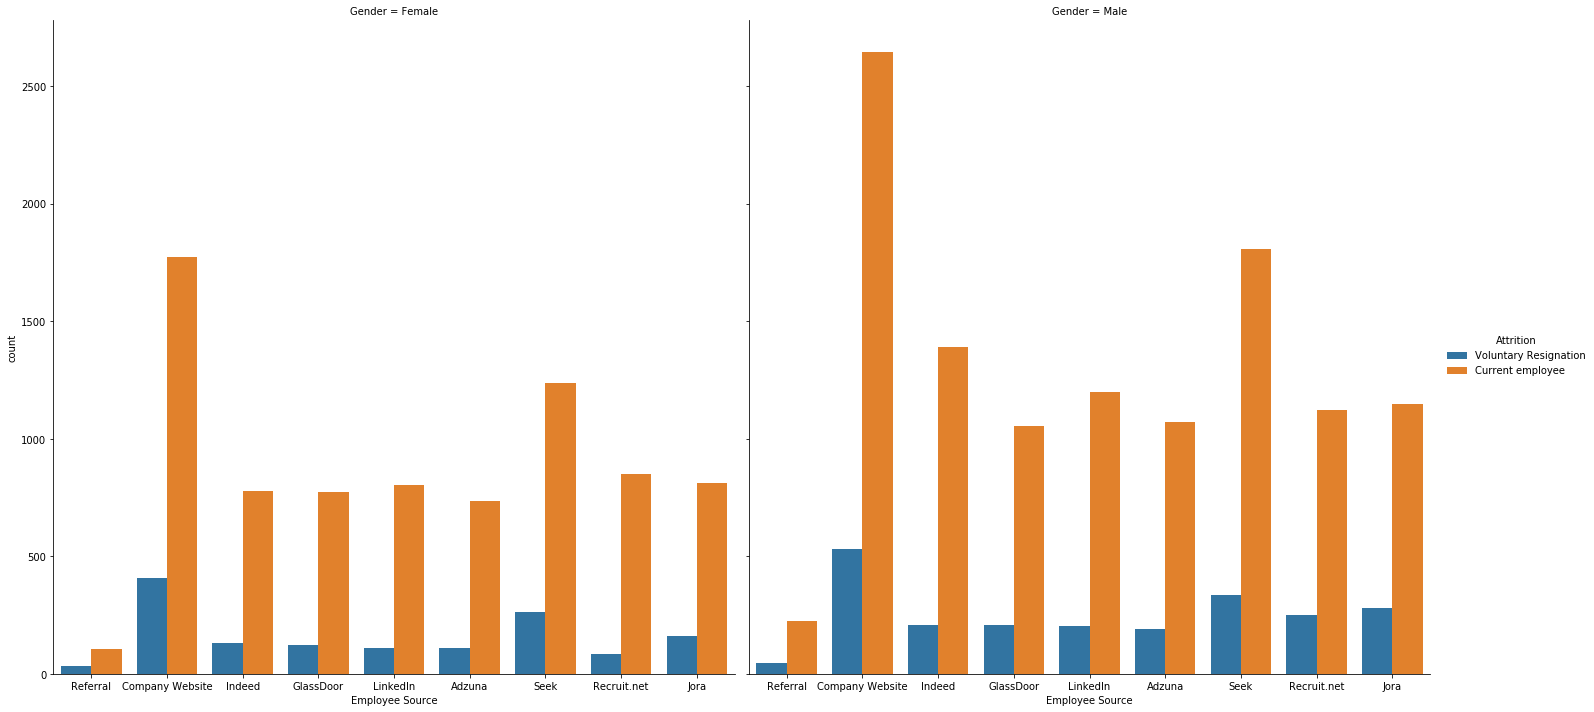

In [216]:
sns.catplot(x='Employee Source',hue='Attrition',col='Gender',data=df,kind='count',height=10)


In [217]:

# At the same time,it is observed that the maximum attrition is taking place for those employees who have joined organization through companies website.
# Hence, reality check should be done in the website.


# DATA CLEANING 

In [218]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [219]:
df.shape

(23190, 37)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  int32  
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EmployeeCount             23190 non-null  object 
 9   EmployeeNumber            23190 non-null  object 
 10  Application ID            23190 non-null  object 
 11  EnvironmentSatisfaction   23190 non-null  float64
 12  Gender                    23190 non-null  object 
 13  HourlyRate                23190 non-null  int32  
 14  JobInv

# Dropping the unnecessary columns and unique identifiers 


In [221]:
df1=df.drop(['EmployeeCount','EmployeeNumber','Application ID','StandardHours','Over18'],axis=1)


In [222]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1,4.0,Life Sciences,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,0.0,No,20,4.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23429,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1,4.0,Medical,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,3.0,No,20,3.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23430,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1,4.0,Life Sciences,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,0.0,No,20,3.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23431,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1,4.0,Medical,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Single,10883,20467.0,3.0,No,20,4.0,3.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0,Company Website


In [223]:
df1.shape

(23190, 32)

# Checking the correlation of target variable with other features


In [224]:
df1['Attrition']=df1['Attrition'].apply(lambda x:1 if x=='Voluntary Resignation' else 0)


(22.5, -0.5)

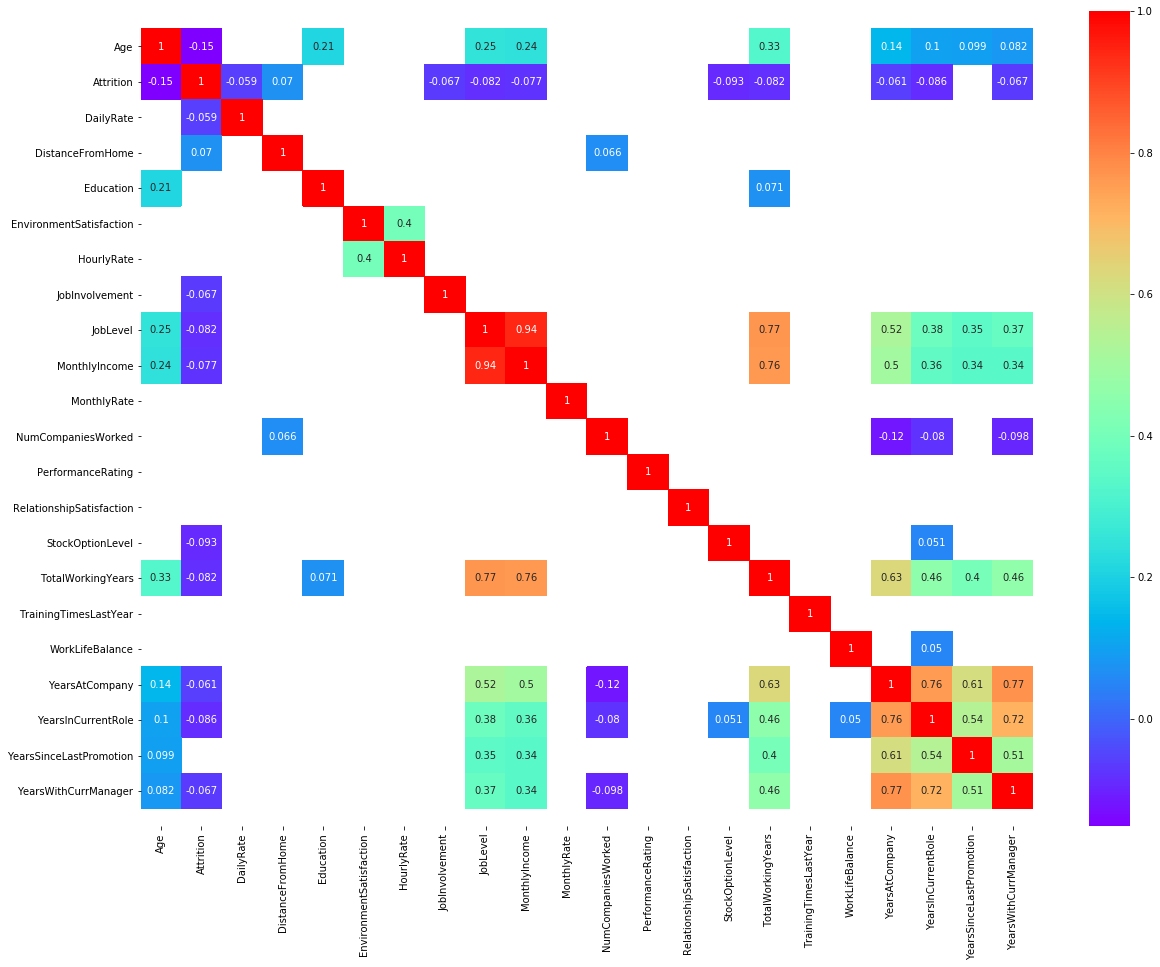

In [225]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(df1.corr(),cmap='rainbow',mask=abs(df1.corr())<0.05,annot=True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

# Based on the above correlation, lets derive some important factors responsible for attrition of employees.


# INFERENCES


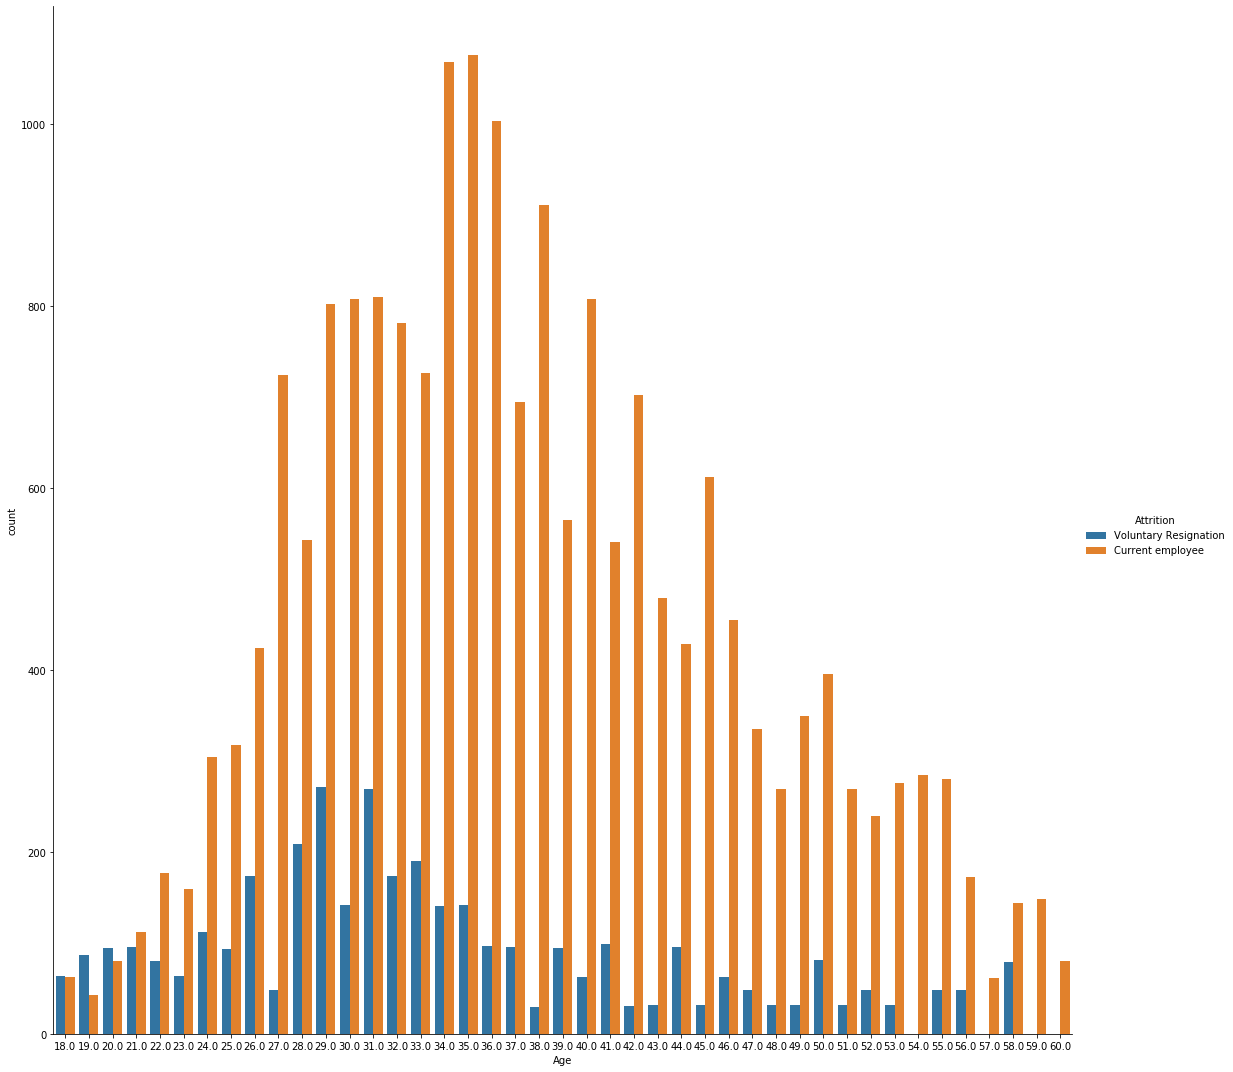

In [226]:
# Impact of Age on Attrition of employees
sns.catplot(x='Age',hue='Attrition',data=df,kind='count',height=15)


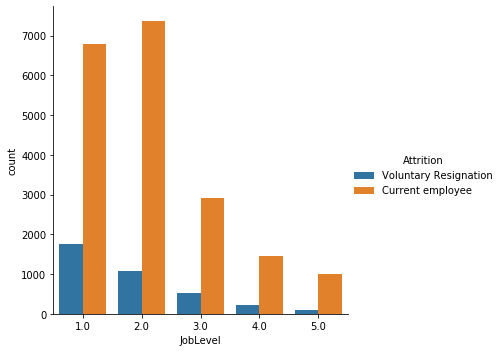

In [227]:
# Impact of Job Level on Attrition of employees
sns.catplot(x='JobLevel',hue='Attrition',data=df,kind='count')


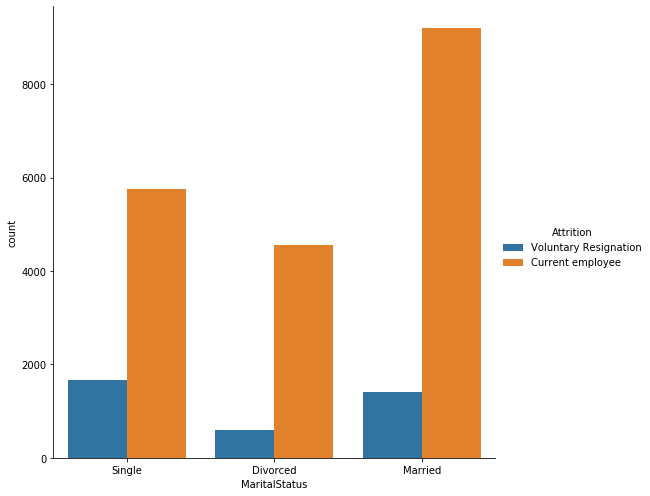

In [228]:
# Impact of Marital Status on Attrition of employees
sns.catplot(x='MaritalStatus',hue='Attrition',data=df,kind='count',height=7)

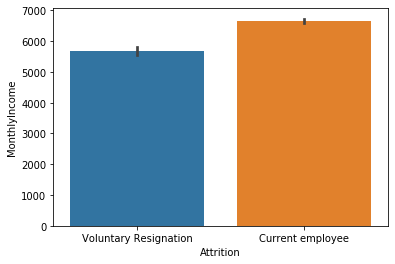

In [229]:
# Monthly Income affecting Attrition rate:
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)

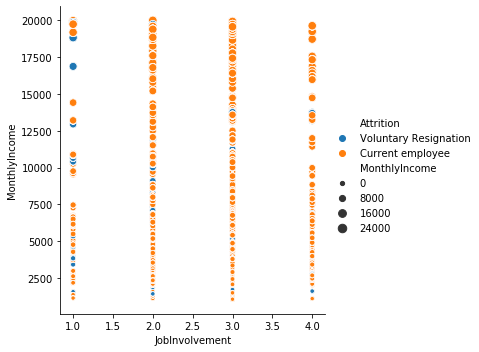

In [230]:
sns.relplot(x='JobInvolvement',y='MonthlyIncome',hue='Attrition',data=df,size='MonthlyIncome')


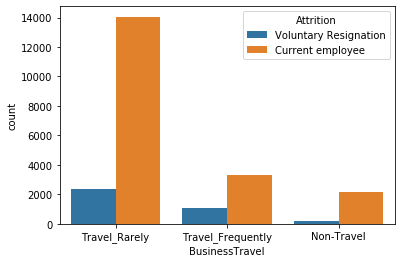

In [231]:
# Business Travel affecting attrition rate
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)

# Checking for outliers in the dataset:¶


In [232]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,60.0,0,Travel_Rarely,370.0,Research & Development,1,4.0,Life Sciences,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,0.0,No,20,4.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23429,60.0,0,Travel_Rarely,370.0,Research & Development,1,4.0,Medical,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,3.0,No,20,3.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23430,60.0,0,Travel_Rarely,370.0,Research & Development,1,4.0,Life Sciences,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,0.0,No,20,3.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23431,60.0,0,Travel_Rarely,370.0,Research & Development,1,4.0,Medical,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Single,10883,20467.0,3.0,No,20,4.0,3.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0,Company Website


In [233]:
# For chosing outliers we will only chose continous feature
# Lets check the value counts of all the features


In [234]:
for i in df1.columns:
    print(i)
    print('value_counts :-','\n',df[i].value_counts(),'\n'*3)
Age

Age
value_counts :- 
 35.0    1218
34.0    1210
36.0    1101
31.0    1079
29.0    1073
32.0     956
30.0     950
38.0     941
33.0     917
40.0     871
37.0     791
27.0     772
28.0     752
42.0     734
39.0     659
45.0     644
41.0     640
26.0     598
44.0     525
46.0     518
43.0     511
50.0     477
24.0     416
25.0     411
47.0     383
49.0     382
55.0     328
53.0     308
48.0     301
51.0     301
52.0     287
54.0     285
22.0     257
58.0     223
23.0     223
56.0     220
21.0     208
20.0     174
59.0     148
19.0     130
18.0     127
60.0      80
57.0      61
Name: Age, dtype: int64 



Attrition
value_counts :- 
 Current employee         19527
Voluntary Resignation     3663
Name: Attrition, dtype: int64 



BusinessTravel
value_counts :- 
 Travel_Rarely        16443
Travel_Frequently     4376
Non-Travel            2371
Name: BusinessTravel, dtype: int64 



DailyRate
value_counts :- 
 691.0     99
1329.0    80
408.0     80
329.0     79
530.0     78
          ..
1122.0  

NameError: name 'Age' is not defined

In [235]:
list=['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany',
      'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

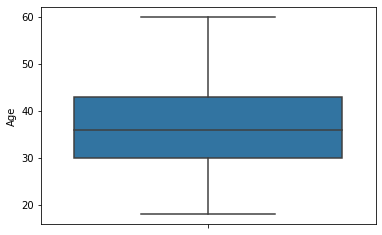

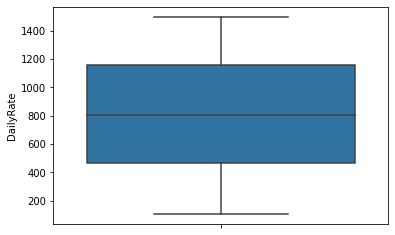

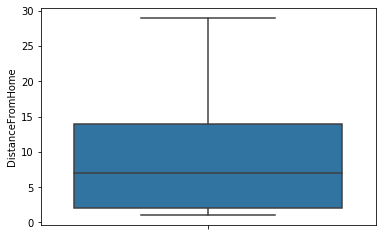

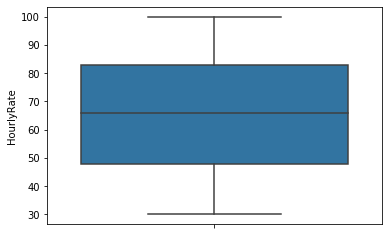

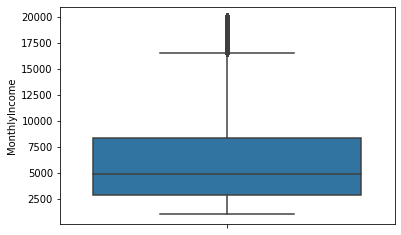

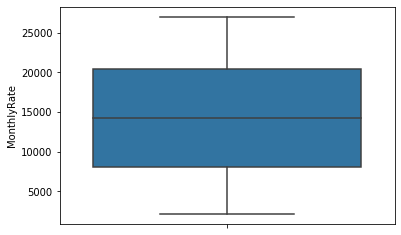

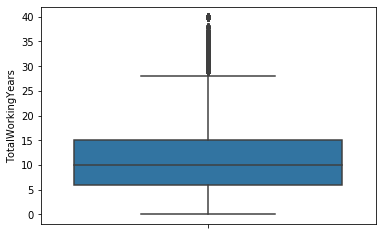

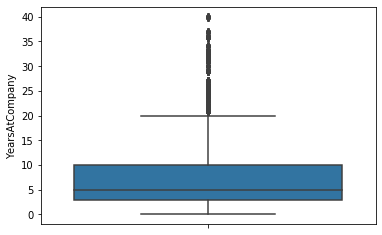

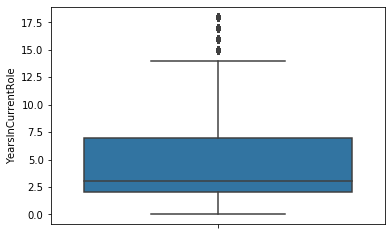

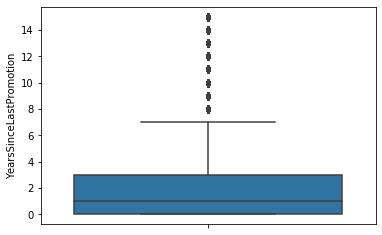

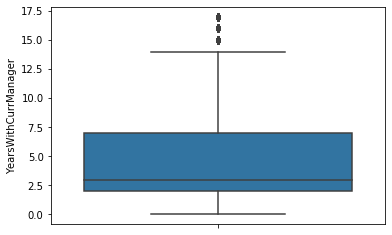

In [237]:
for i in list:
    sns.boxplot(y=df1[i])
    plt.show()

# Monthly Income, Total Working Years, Years At Company, Years In Current Role, Years Since Last Promotion, Years with Current Manager have outliers

In [238]:
# We will use Z-score to remove outliers


In [239]:
import scipy.stats as st


In [240]:
outliers = st.zscore(df1[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears'
                          ,'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])


In [241]:
df1 = df1[(abs(outliers)<3).all(axis=1)]
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [242]:
df1.shape

(21889, 32)

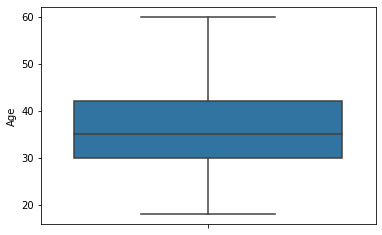

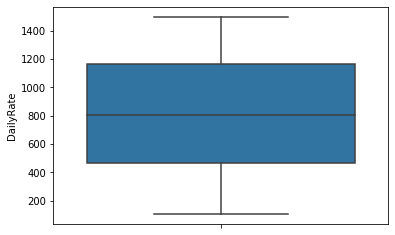

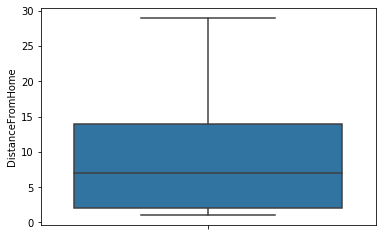

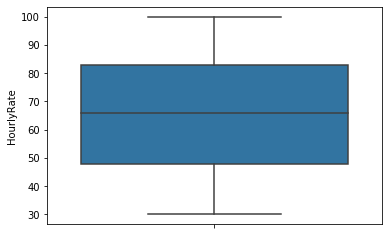

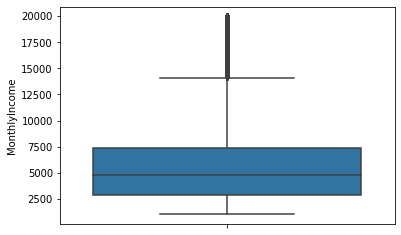

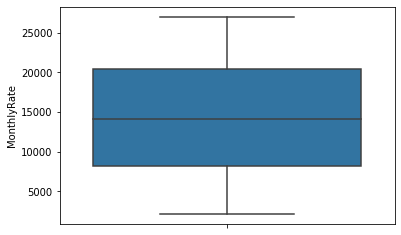

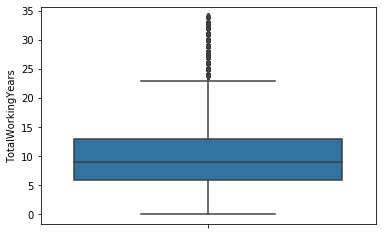

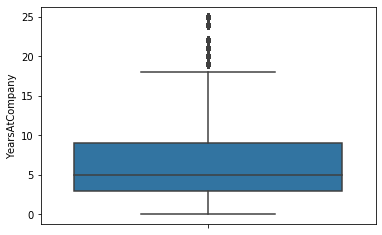

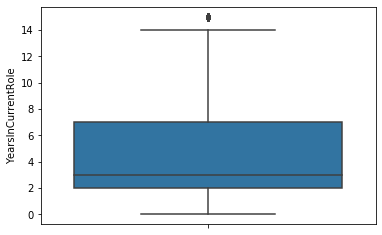

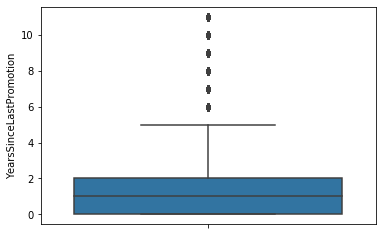

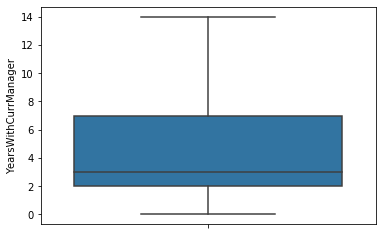

In [243]:
for i in list:
    sns.boxplot(y=df1[i])
    plt.show()

# Checking for skewness of the continous features:¶


In [244]:
for i in list:
    print(i,' : ',df[i].skew())

Age  :  0.40942787335956465
DailyRate  :  -0.00530445307196542
DistanceFromHome  :  0.9607209252604167
HourlyRate  :  -0.03516672051617067
MonthlyIncome  :  1.3671071005918969
MonthlyRate  :  0.018858099963808123
TotalWorkingYears  :  1.113724542372283
YearsAtCompany  :  1.7552883007247444
YearsInCurrentRole  :  0.9158283975265031
YearsSinceLastPromotion  :  1.9874813179321482
YearsWithCurrManager  :  0.8294403642039936


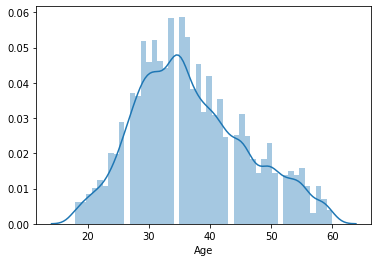

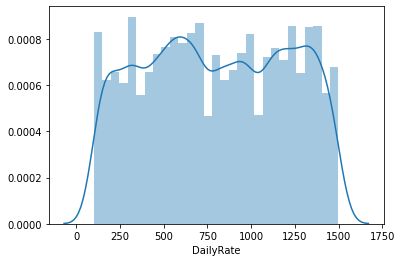

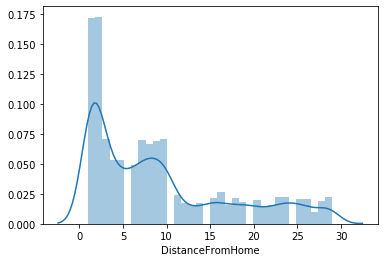

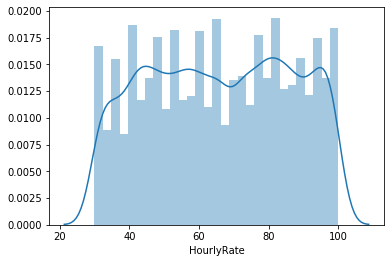

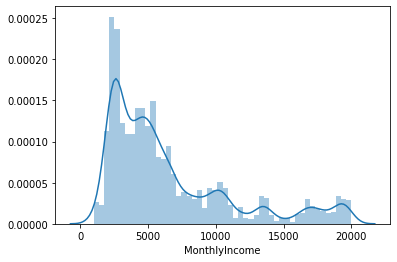

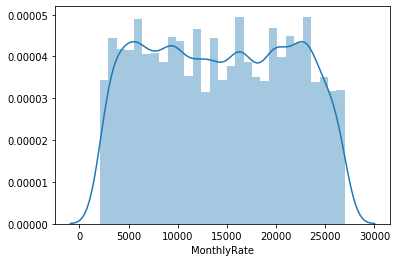

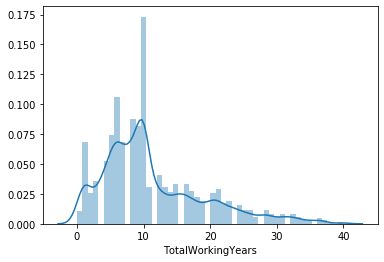

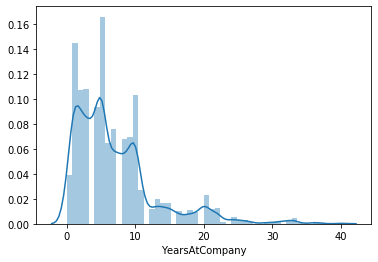

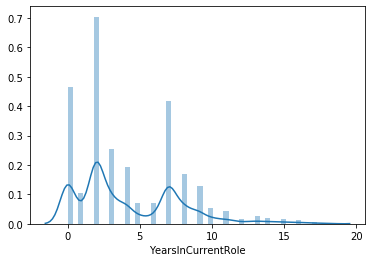

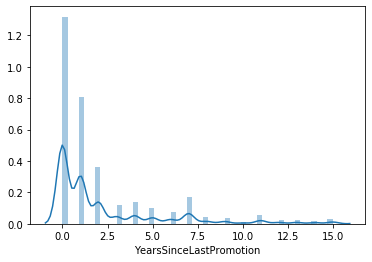

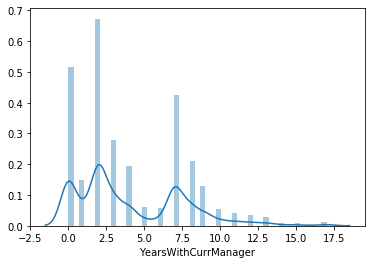

In [245]:
for i in list:
    sns.distplot(df[i])
    plt.show()

In [246]:
# We will do boxcox transformation for fixing the skewness of the dataset


In [247]:
for i in list:
    df1[i]=st.boxcox(df1[i]+1)[0]
df1.skew()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Age                        -0.005388
Attrition                   1.840793
DailyRate                  -0.199664
DistanceFromHome           -0.008176
Education                  -0.289235
EnvironmentSatisfaction    -0.322249
HourlyRate                 -0.106831
JobInvolvement             -0.502830
JobLevel                    1.117396
JobSatisfaction            -0.346317
MonthlyIncome               0.027716
MonthlyRate                -0.176391
NumCompaniesWorked          1.009516
PercentSalaryHike           0.796441
PerformanceRating           1.916284
RelationshipSatisfaction   -0.295191
StockOptionLevel            0.957712
TotalWorkingYears          -0.008980
TrainingTimesLastYear       0.578995
WorkLifeBalance            -0.554681
YearsAtCompany             -0.025868
YearsInCurrentRole         -0.069770
YearsSinceLastPromotion     0.212423
YearsWithCurrManager       -0.070849
dtype: float64

# CONVERTING CATEGORICAL COLUMNS TO NUMERICAL COLUMNS¶

In [248]:
df2=df1.copy()

In [249]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21889 entries, 0 to 23432
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       21889 non-null  float64
 1   Attrition                 21889 non-null  int64  
 2   BusinessTravel            21889 non-null  object 
 3   DailyRate                 21889 non-null  float64
 4   Department                21889 non-null  object 
 5   DistanceFromHome          21889 non-null  float64
 6   Education                 21889 non-null  float64
 7   EducationField            21889 non-null  object 
 8   EnvironmentSatisfaction   21889 non-null  float64
 9   Gender                    21889 non-null  object 
 10  HourlyRate                21889 non-null  float64
 11  JobInvolvement            21889 non-null  float64
 12  JobLevel                  21889 non-null  float64
 13  JobRole                   21889 non-null  object 
 14  JobSat

# Encoding categorical columns:¶

In [250]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [251]:
df2['BusinessTravel'].value_counts()


Travel_Rarely        15480
Travel_Frequently     4168
Non-Travel            2241
Name: BusinessTravel, dtype: int64

In [252]:
# We will do get dummies or ohe for this column


In [253]:
df2['Gender'].value_counts()


Male      13173
Female     8716
Name: Gender, dtype: int64

In [254]:
df2['Gender']=le.fit_transform(df2['Gender'])


In [255]:
df2['JobRole'].value_counts()


Sales Executive              4861
Research Scientist           4572
Laboratory Technician        4014
Manufacturing Director       2272
Healthcare Representative    1938
Sales Representative         1299
Manager                      1073
Research Director            1028
Human Resources               832
Name: JobRole, dtype: int64

In [256]:
# We will do get dummies or ohe for this column


In [257]:
df2['JobSatisfaction'].value_counts()


4    6902
3    6638
1    4239
2    4110
Name: JobSatisfaction, dtype: int64

In [258]:
df2['JobSatisfaction']=df2['JobSatisfaction'].astype('int')


In [259]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21889 entries, 0 to 23432
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       21889 non-null  float64
 1   Attrition                 21889 non-null  int64  
 2   BusinessTravel            21889 non-null  object 
 3   DailyRate                 21889 non-null  float64
 4   Department                21889 non-null  object 
 5   DistanceFromHome          21889 non-null  float64
 6   Education                 21889 non-null  float64
 7   EducationField            21889 non-null  object 
 8   EnvironmentSatisfaction   21889 non-null  float64
 9   Gender                    21889 non-null  int32  
 10  HourlyRate                21889 non-null  float64
 11  JobInvolvement            21889 non-null  float64
 12  JobLevel                  21889 non-null  float64
 13  JobRole                   21889 non-null  object 
 14  JobSat

In [260]:
df2['MaritalStatus'].value_counts()


Married     10041
Single       7054
Divorced     4794
Name: MaritalStatus, dtype: int64

In [261]:
# We will do get dummies or ohe for this column


In [262]:
df2['OverTime'].value_counts()


No     15667
Yes     6222
Name: OverTime, dtype: int64

In [263]:
df2['OverTime']=le.fit_transform(df2['OverTime'])


In [264]:
df2['Employee Source'].value_counts()


Company Website    5115
Seek               3433
Indeed             2349
Jora               2313
Recruit.net        2157
LinkedIn           2123
GlassDoor          2047
Adzuna             2004
Referral            348
Name: Employee Source, dtype: int64

In [265]:
# We will do get dummies or ohe for this column


In [266]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21889 entries, 0 to 23432
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       21889 non-null  float64
 1   Attrition                 21889 non-null  int64  
 2   BusinessTravel            21889 non-null  object 
 3   DailyRate                 21889 non-null  float64
 4   Department                21889 non-null  object 
 5   DistanceFromHome          21889 non-null  float64
 6   Education                 21889 non-null  float64
 7   EducationField            21889 non-null  object 
 8   EnvironmentSatisfaction   21889 non-null  float64
 9   Gender                    21889 non-null  int32  
 10  HourlyRate                21889 non-null  float64
 11  JobInvolvement            21889 non-null  float64
 12  JobLevel                  21889 non-null  float64
 13  JobRole                   21889 non-null  object 
 14  JobSat

In [267]:
df2=pd.get_dummies(df2,drop_first=True)


In [268]:
df2.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,...,PercentSalaryHike_16,PercentSalaryHike_17,PercentSalaryHike_18,PercentSalaryHike_19,PercentSalaryHike_20,PercentSalaryHike_21,PercentSalaryHike_22,PercentSalaryHike_23,PercentSalaryHike_24,PercentSalaryHike_25,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
0,5.378612,1,262.72458,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,8.0,1,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5.378612,1,262.72458,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,4.0,1,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,5.378612,1,262.72458,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,8.0,1,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,5.378612,1,262.72458,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,4.0,1,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5.378612,1,262.72458,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,8.0,1,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [269]:
Unscaled_data=df2.drop('Attrition',axis=1)
Unscaled_data

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,...,PercentSalaryHike_16,PercentSalaryHike_17,PercentSalaryHike_18,PercentSalaryHike_19,PercentSalaryHike_20,PercentSalaryHike_21,PercentSalaryHike_22,PercentSalaryHike_23,PercentSalaryHike_24,PercentSalaryHike_25,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
0,5.378612,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,8.0,1,3.0,1.0,0.0,3.361263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5.378612,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,4.0,1,3.0,1.0,0.0,3.361263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,5.378612,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,8.0,1,3.0,1.0,0.0,3.361263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,5.378612,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,4.0,1,3.0,1.0,0.0,3.361263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5.378612,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,8.0,1,3.0,1.0,0.0,3.361263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,6.147757,114.538506,0.698834,4.0,3.0,1,47.532510,1.0,3.0,4,3.948513,1598.313517,0.0,0,4.0,3.0,1.0,5.417590,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
23429,6.147757,114.538506,0.698834,4.0,3.0,1,47.532510,1.0,3.0,4,3.948513,1598.313517,3.0,0,3.0,3.0,1.0,5.417590,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
23430,6.147757,114.538506,0.698834,4.0,3.0,1,47.532510,1.0,3.0,4,3.948513,1598.313517,0.0,0,3.0,3.0,1.0,5.417590,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
23431,6.147757,114.538506,0.698834,4.0,3.0,1,47.532510,1.0,3.0,4,3.948513,1598.313517,3.0,0,4.0,3.0,1.0,5.563610,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


(66.5, -0.5)

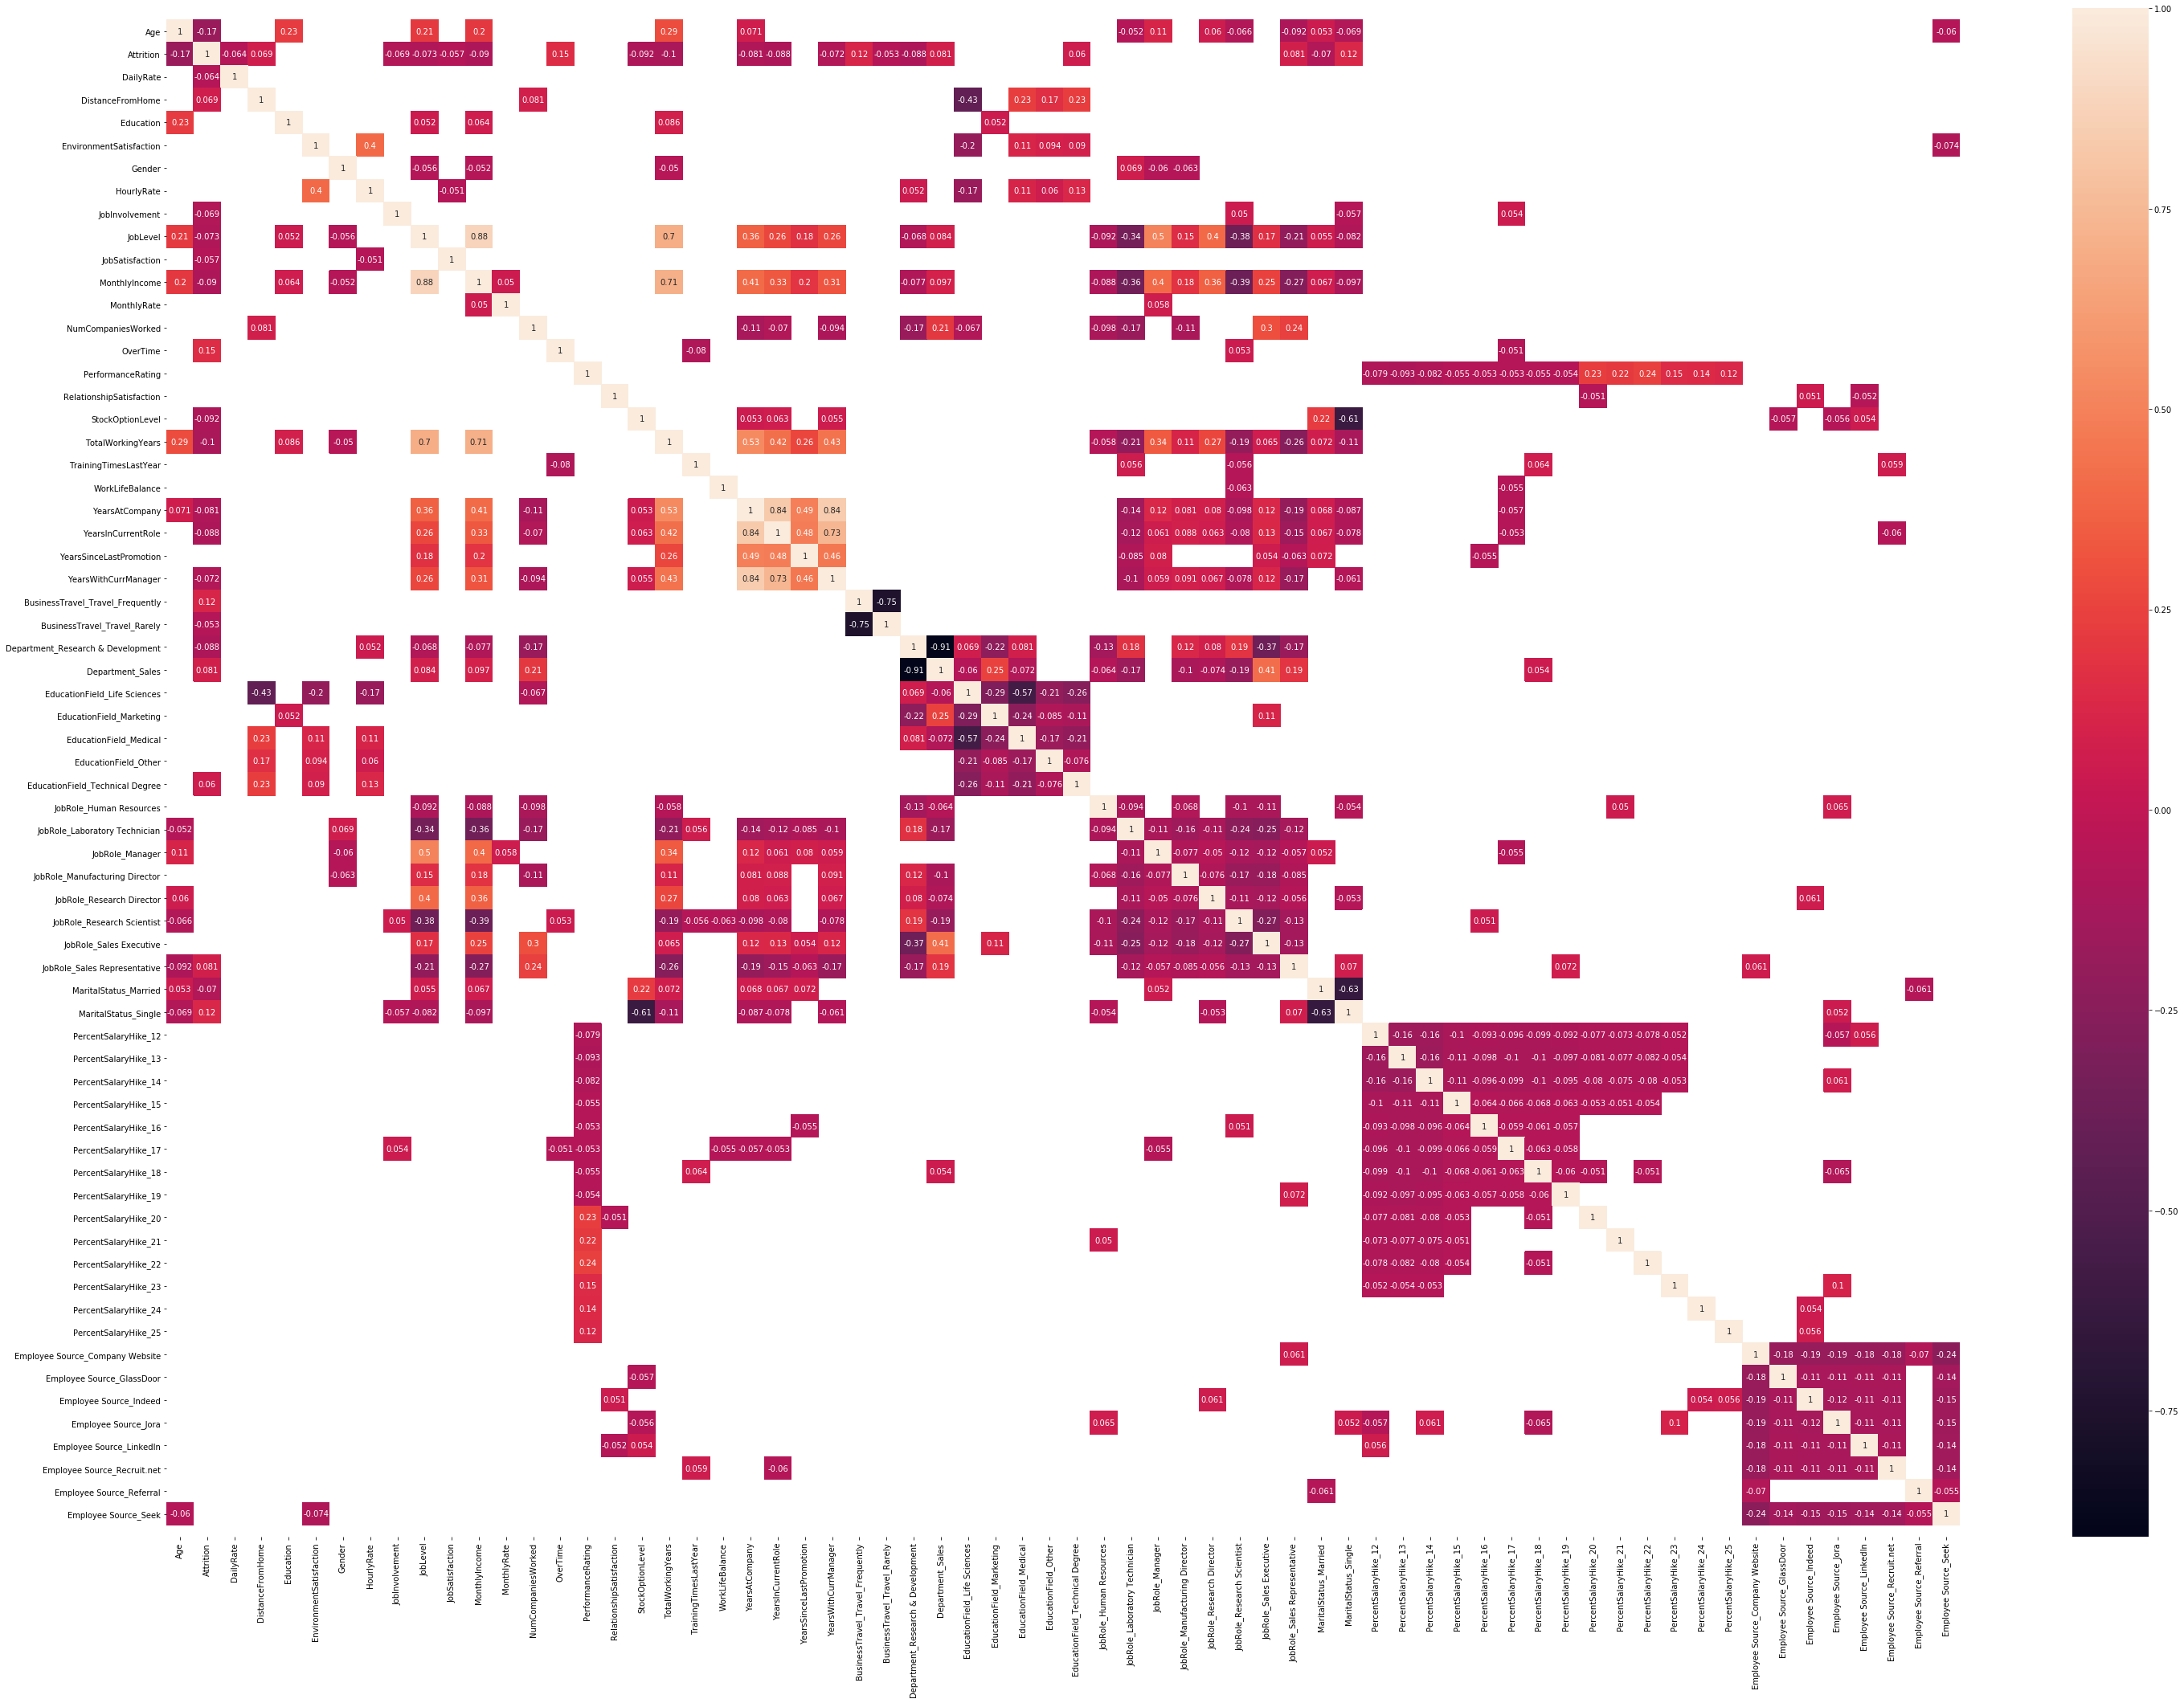

In [270]:
plt.figure(figsize=(50,35))
ax = sns.heatmap(df2.corr(),annot=True,mask=abs(df2.corr())<0.05)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

# Marital Status Single, Business Travel Frequently, Job Role Manager, Department Sales are the sub features which are mostly contributing towards attrition of employees



In [271]:
# Now our dataset is cleaned and ready for processing

# Splitting the dataset into independent features 'X' and target variable y'

In [272]:
X=df2.drop('Attrition',axis=1)
y=df2['Attrition']

In [273]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,...,PercentSalaryHike_16,PercentSalaryHike_17,PercentSalaryHike_18,PercentSalaryHike_19,PercentSalaryHike_20,PercentSalaryHike_21,PercentSalaryHike_22,PercentSalaryHike_23,PercentSalaryHike_24,PercentSalaryHike_25,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
0,5.378612,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,8.0,1,3.0,1.0,0.0,3.361263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5.378612,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,4.0,1,3.0,1.0,0.0,3.361263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,5.378612,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,8.0,1,3.0,1.0,0.0,3.361263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,5.378612,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,4.0,1,3.0,1.0,0.0,3.361263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5.378612,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,8.0,1,3.0,1.0,0.0,3.361263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,6.147757,114.538506,0.698834,4.0,3.0,1,47.532510,1.0,3.0,4,3.948513,1598.313517,0.0,0,4.0,3.0,1.0,5.417590,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
23429,6.147757,114.538506,0.698834,4.0,3.0,1,47.532510,1.0,3.0,4,3.948513,1598.313517,3.0,0,3.0,3.0,1.0,5.417590,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
23430,6.147757,114.538506,0.698834,4.0,3.0,1,47.532510,1.0,3.0,4,3.948513,1598.313517,0.0,0,3.0,3.0,1.0,5.417590,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
23431,6.147757,114.538506,0.698834,4.0,3.0,1,47.532510,1.0,3.0,4,3.948513,1598.313517,3.0,0,4.0,3.0,1.0,5.563610,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [274]:
y

0        1
1        1
2        1
3        1
4        1
        ..
23428    0
23429    0
23430    0
23431    0
23432    0
Name: Attrition, Length: 21889, dtype: int64

In [275]:

import statsmodels.api as sm

In [276]:

X_con=sm.add_constant(X)

In [277]:
model=sm.Logit(y,X_con).fit()
result=model.summary()
result

Optimization terminated successfully.
         Current function value: 0.373455
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                21889
Model:                          Logit   Df Residuals:                    21823
Method:                           MLE   Df Model:                           65
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:                  0.1551
Time:                        06:53:13   Log-Likelihood:                -8174.6
converged:                       True   LL-Null:                       -9674.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                13.6933      1.882      7.276      0.000      10.005      17.382
Age                                  -1.0418      0.048    -21.638      0.000      -1.136      -0.947
DailyRate                            -0.0021      0.000     -8.575      0.000      -0.003      -0.002
DistanceFromHome                      0.1839      0.026      7.131      0.000       0.133       0.234
Education                             0.0223      0.020      1.102      0.270      -0.017       0.062
EnvironmentSatisfaction              -0.2236      0.021    -10.828      0.000      -0.264      -0.183
Gender                                0.1637      0.042      3.879      0.000       0.081       0.246
HourlyRate                            0.0184      0.002      7.532      0.000       0.014       0.023
JobInvolvement                       -0.3043      0.029    -10.663      0.000      -0.360      -0.248
JobLevel                              0.2004      0.051      3.925      0.000       0.100       0.300
JobSatisfaction                      -0.1759      0.018     -9.680      0.000      -0.212      -0.140
MonthlyIncome                        -2.3672      0.494     -4.788      0.000      -3.336      -1.398
MonthlyRate                        4.946e-05   4.53e-05      1.091      0.275   -3.94e-05       0.000
NumCompaniesWorked                    0.0350      0.009      3.909      0.000       0.017       0.053
OverTime                              0.9818      0.042     23.135      0.000       0.899       1.065
PerformanceRating                    -0.0411      0.065     -0.636      0.524      -0.168       0.085
RelationshipSatisfaction             -0.0594      0.019     -3.155      0.002      -0.096      -0.022
StockOptionLevel                     -0.0783      0.033     -2.397      0.017      -0.142      -0.014
TotalWorkingYears                    -0.0227      0.024     -0.955      0.339      -0.069       0.024
TrainingTimesLastYear                -0.1068      0.016     -6.535      0.000      -0.139      -0.075
WorkLifeBalance                      -0.1623      0.029     -5.654      0.000      -0.219      -0.106
YearsAtCompany                        0.0419      0.048      0.875      0.381      -0.052       0.136
YearsInCurrentRole                   -0.2202      0.034     -6.489      0.000      -0.287      -0.154
YearsSinceLastPromotion               0.2814      0.054      5.205      0.000       0.175       0.387
YearsWithCurrManager                 -0.0234      0.036     -0.658      0.511      -0.093       0.046
BusinessTravel_Travel_Frequently      1.4561      0.091     15.972      0.000       1.277       1.635
BusinessTravel_Travel_Rarely          0.7129      0.085      8.360      0.000       0.546       0.880
Department_Research & Development    -0.4286      0.112     -3.813      0.000      -0.649      -0.208
Department_Sales                      0.0444      0.116      0.382      0.702  

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier as KNN
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from tpot import TPOTClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

C:\Users\HP\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [ ]:
pip install imblearn

In [ ]:
pip install xgboost

In [279]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [280]:
pip install tpot

  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11959 sha256=3580c4faea391cee842bd3feb8e4435ca2c4893650e8dae0bbeb01e51c1a6c95
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\e2\d2\79\eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
Note: you may need to restart the kernel to use updated packages.


# Splitting dataset in train and test:

In [282]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)


# Data Scaling using standard scaler
# Apply classifier

In [ ]:
pip install xgboost

In [283]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr',LogisticRegression())])
pipeline_dt=Pipeline([('scaler2',StandardScaler()),
                     ('dt',DecisionTreeClassifier())])
pipeline_rf=Pipeline([('scalar3',StandardScaler()),
                     ('rfc',RandomForestClassifier())])
pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('knn',KNN())])
pipeline_xgbc=Pipeline([('scalar5',StandardScaler()),
                     ('xgboost',XGBClassifier())])
pipeline_lgbc=Pipeline([('scalar6',StandardScaler()),
                     ('lgbc',lgb.LGBMClassifier())])
pipeline_ada=Pipeline([('scalar7',StandardScaler()),
                     ('adaboost',AdaBoostClassifier())])
pipeline_sgdc=Pipeline([('scalar8',StandardScaler()),
                     ('sgradient',SGDClassifier())])
pipeline_nb=Pipeline([('scalar9',StandardScaler()),
                     ('nb',GaussianNB())])
pipeline_extratree=Pipeline([('scalar10',StandardScaler()),
                     ('extratree',ExtraTreesClassifier())])
pipeline_svc=Pipeline([('scalar11',StandardScaler()),
                     ('svc',SVC())])
pipeline_gbc=Pipeline([('scalar12',StandardScaler()),
                     ('GBC',GradientBoostingClassifier())])


# # Lets make the list of pipelines

In [284]:

pipelines=[pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_xgbc,pipeline_lgbc,pipeline_ada,
           pipeline_sgdc,pipeline_nb,pipeline_extratree,pipeline_svc,pipeline_gbc]

In [285]:
pipe_dict={0:'Logistic Regression',1:'Decision Tree',2:'RandomForestClassifier',3:'KNN',4:'XGBC',5:'LGBC',6:'ADA',7:'SGDC',8:'NB',9:'ExtraTree',10:'SVC',11:'GBC'}

In [286]:
# Let's check whether the target variable is balanced or not:

0    18356
1     3533
Name: Attrition, dtype: int64

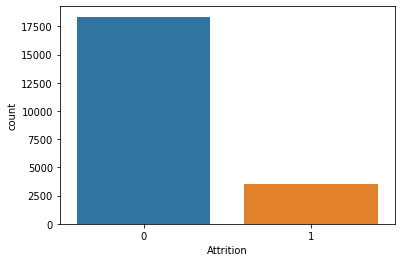

In [287]:
sns.countplot(df2['Attrition'])
df2['Attrition'].value_counts()

In [288]:
# As the dataset is highly imbalanced, we will use SMOTE:

In [289]:
smote = SMOTE('auto')

C:\Users\HP\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=auto as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [290]:
X_sm, y_sm = smote.fit_sample(X_train,y_train)
print(X_sm.shape, y_sm.shape)

(25692, 65) (25692,)


# With SMOTE - Base model

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report,roc_auc_score, roc_curve


# Logistic Regression:

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion Matrix-Train
 [[9130 3716]
 [4377 8469]]
Accuracy Score-Train
 0.6849992215475634
Classification Report-Train
               precision    recall  f1-score   support

           0       0.68      0.71      0.69     12846
           1       0.70      0.66      0.68     12846

    accuracy                           0.68     25692
   macro avg       0.69      0.68      0.68     25692
weighted avg       0.69      0.68      0.68     25692

AUC Score-Train
 0.75848268336615



Confusion Matrix-Test
 [[3888 1622]
 [ 455  602]]
Accuracy Score-Test
 0.6837216384955078
Classification Report-Test
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      5510
           1       0.27      0.57      0.37      1057

    accuracy                           0.68      6567
   macro avg       0.58      0.64      0.58      6567
weighted avg       0.79      0.68      0.72      6567

AUC Score-Test
 0.6927054448177993




Plot : AUC-ROC Curve


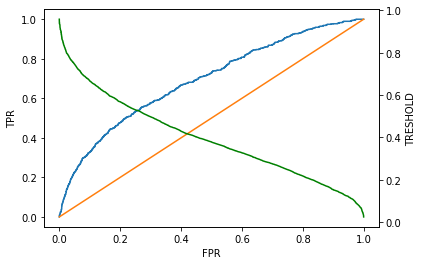

In [292]:
lr=LogisticRegression()
lr.fit(X_sm,y_sm)
y_train_pred=lr.predict(X_sm)
y_train_prob=lr.predict_proba(X_sm)[:,1]

y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]

print('Confusion Matrix-Train\n',confusion_matrix(y_sm,y_train_pred))
print('Accuracy Score-Train\n',accuracy_score(y_sm,y_train_pred))
print('Classification Report-Train\n',classification_report(y_sm,y_train_pred))
print('AUC Score-Train\n',roc_auc_score(y_sm,y_train_prob))
print('\n'*2)
print('Confusion Matrix-Test\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score-Test\n',accuracy_score(y_test,y_test_pred))
print('Classification Report-Test\n',classification_report(y_test,y_test_pred))
print('AUC Score-Test\n',roc_auc_score(y_test,y_test_prob))
print('\n'*3)
print('Plot : AUC-ROC Curve')
fpr,tpr,threshold= roc_curve(y_test,y_test_prob)
threshold[0]=threshold[0]-1
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax2=ax1.twinx()
ax2.plot(fpr,threshold,'-g')
ax2.set_ylabel('TRESHOLD')
plt.show()
plt.show()

# Without SMOTE-Base Model

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion Matrix-Train
 [[12747    99]
 [ 2277   199]]
Accuracy Score-Train
 0.8449288604620807
Classification Report-Train
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     12846
           1       0.67      0.08      0.14      2476

    accuracy                           0.84     15322
   macro avg       0.76      0.54      0.53     15322
weighted avg       0.82      0.84      0.79     15322

AUC Score-Train
 0.7263348572891695



Confusion Matrix-Test
 [[5459   51]
 [ 960   97]]
Accuracy Score-Test
 0.8460484239378712
Classification Report-Test
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      5510
           1       0.66      0.09      0.16      1057

    accuracy                           0.85      6567
   macro avg       0.75      0.54      0.54      6567
weighted avg       0.82      0.85      0.79      6567

AUC Score-Test
 0.7149132822922801




Plot : AUC-ROC Curve


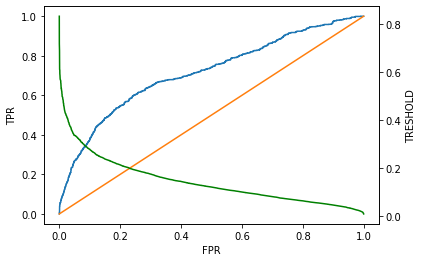

In [293]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_train_prob=lr.predict_proba(X_train)[:,1]

y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]

print('Confusion Matrix-Train\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score-Train\n',accuracy_score(y_train,y_train_pred))
print('Classification Report-Train\n',classification_report(y_train,y_train_pred))
print('AUC Score-Train\n',roc_auc_score(y_train,y_train_prob))
print('\n'*2)
print('Confusion Matrix-Test\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score-Test\n',accuracy_score(y_test,y_test_pred))
print('Classification Report-Test\n',classification_report(y_test,y_test_pred))
print('AUC Score-Test\n',roc_auc_score(y_test,y_test_prob))
print('\n'*3)
print('Plot : AUC-ROC Curve')
fpr,tpr,threshold= roc_curve(y_test,y_test_prob)
threshold[0]=threshold[0]-1
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax2=ax1.twinx()
ax2.plot(fpr,threshold,'-g')
ax2.set_ylabel('TRESHOLD')
plt.show()
plt.show()

# comparing Models ROC-AUC Curve:

In [294]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()

# knn
model2 = KNeighborsClassifier()

# Random Forest Classifier
model3 = RandomForestClassifier()

# XGBClassifier
model4=XGBClassifier()

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:26:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [295]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [296]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1, auc_score2,auc_score3, auc_score4)

0.7149132822922801 0.9721735830785001 0.9998380857372937 0.999311649756957


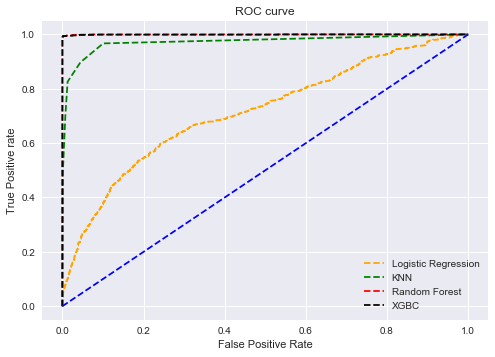

In [297]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='XGBC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Multiple Base Model Performance:

In [298]:

for i in pipelines:
    i.fit(X_sm,y_sm)
    y_pred=i.predict(X_test)
    print('Classification Report : ', i[1] ,'\n',(classification_report(y_test,y_pred)))
    print('f1-score : ', i[1],' : ',(f1_score(y_test,y_pred)))
    print('\n'*2,'------------------------------------------------------------------------------------------------')

Classification Report :  LogisticRegression() 
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      5510
           1       0.34      0.50      0.40      1057

    accuracy                           0.76      6567
   macro avg       0.62      0.66      0.63      6567
weighted avg       0.81      0.76      0.78      6567

f1-score :  LogisticRegression()  :  0.4044173648134044


 ------------------------------------------------------------------------------------------------
Classification Report :  DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5510
           1       0.97      0.98      0.97      1057

    accuracy                           0.99      6567
   macro avg       0.98      0.99      0.98      6567
weighted avg       0.99      0.99      0.99      6567

f1-score :  DecisionTreeClassifier()  :  0.9731258840169731


 ---------------------------

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report :  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 
               precision    recall  f1-score   support

           0       1.00   

# Base model with best f1-score : XGBClassifier - 99.24%

# KNN


Confusion Matrix-Train
 [[12580   266]
 [  689  1787]]
Accuracy Score-Train
 0.9376713222816865
Classification Report-Train
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     12846
           1       0.87      0.72      0.79      2476

    accuracy                           0.94     15322
   macro avg       0.91      0.85      0.88     15322
weighted avg       0.94      0.94      0.94     15322

AUC Score-Train
 0.9708621731725924



Confusion Matrix-Test
 [[5288  222]
 [ 477  580]]
Accuracy Score-Test
 0.8935587026039288
Classification Report-Test
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      5510
           1       0.72      0.55      0.62      1057

    accuracy                           0.89      6567
   macro avg       0.82      0.75      0.78      6567
weighted avg       0.89      0.89      0.89      6567

AUC Score-Test
 0.9284047066741985




Plot : AUC-ROC Curve


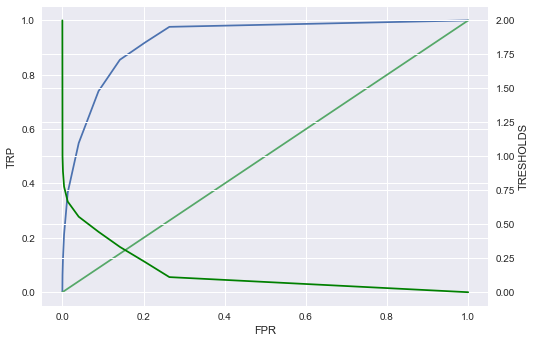

In [299]:
knn=KNN(n_neighbors=9)
knn.fit(X_train,y_train)
y_train_pred=knn.predict(X_train)
y_train_prob=knn.predict_proba(X_train)[:,1]

y_test_pred=knn.predict(X_test)
y_test_prob=knn.predict_proba(X_test)[:,1]

print('Confusion Matrix-Train\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score-Train\n',accuracy_score(y_train,y_train_pred))
print('Classification Report-Train\n',classification_report(y_train,y_train_pred))
print('AUC Score-Train\n',roc_auc_score(y_train,y_train_prob))
print('\n'*2)
print('Confusion Matrix-Test\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score-Test\n',accuracy_score(y_test,y_test_pred))
print('Classification Report-Test\n',classification_report(y_test,y_test_pred))
print('AUC Score-Test\n',roc_auc_score(y_test,y_test_prob))
print('\n'*3)
print('Plot : AUC-ROC Curve')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TRP')
ax2=ax1.twinx()
ax2.plot(fpr,thresholds,'-g')
ax2.set_ylabel('TRESHOLDS')
plt.show()
plt.show()

# Random Forest Classifier:

Confusion Matrix-Train
 [[12821    25]
 [  943  1533]]
Accuracy Score-Train
 0.936822869077144
Classification Report-Train
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     12846
           1       0.98      0.62      0.76      2476

    accuracy                           0.94     15322
   macro avg       0.96      0.81      0.86     15322
weighted avg       0.94      0.94      0.93     15322

AUC Score-Train
 0.9896435486414559



Confusion Matrix-Test
 [[5489   21]
 [ 544  513]]
Accuracy Score-Test
 0.9139637581848638
Classification Report-Test
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      5510
           1       0.96      0.49      0.64      1057

    accuracy                           0.91      6567
   macro avg       0.94      0.74      0.80      6567
weighted avg       0.92      0.91      0.90      6567

AUC Score-Test
 0.9731590623052263




Plot : AUC-ROC Curve


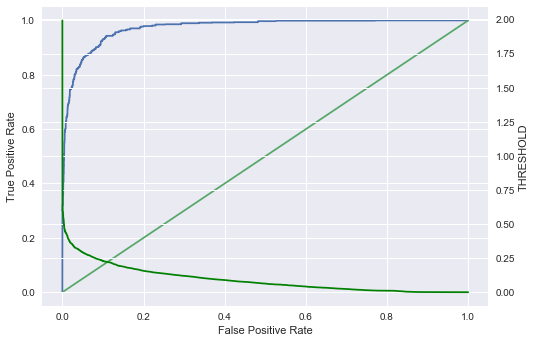

In [300]:
rf=RandomForestClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=5)
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
y_train_prob=rf.predict_proba(X_train)[:,1]

y_test_pred=rf.predict(X_test)
y_test_prob=rf.predict_proba(X_test)[:,1]

print('Confusion Matrix-Train\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score-Train\n',accuracy_score(y_train,y_train_pred))
print('Classification Report-Train\n',classification_report(y_train,y_train_pred))
print('AUC Score-Train\n',roc_auc_score(y_train,y_train_prob))
print('\n'*2)
print('Confusion Matrix-Test\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score-Test\n',accuracy_score(y_test,y_test_pred))
print('Classification Report-Test\n',classification_report(y_test,y_test_pred))
print('AUC Score-Test\n',roc_auc_score(y_test,y_test_prob))
print('\n'*3)
print('Plot : AUC-ROC Curve')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax2=ax1.twinx()
ax2.plot(fpr,thresholds,'-g')
ax2.set_ylabel('THRESHOLD')
plt.show()
plt.show()

# XGBClassifier:

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix-Train
 [[12846     0]
 [    1  2475]]
Accuracy Score-Train
 0.9999347343688814
Classification Report-Train
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12846
           1       1.00      1.00      1.00      2476

    accuracy                           1.00     15322
   macro avg       1.00      1.00      1.00     15322
weighted avg       1.00      1.00      1.00     15322

AUC Score-Train
 1.0



Confusion Matrix-Test
 [[5507    3]
 [  12 1045]]
Accuracy Score-Test
 0.9977158519872088
Classification Report-Test
               precision    recall  f1-score   support

           0       1.00      1.00      1.

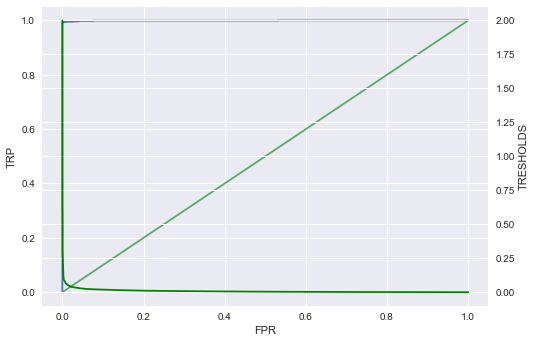

In [301]:
xgbc=XGBClassifier()
xgbc.fit(X_train,y_train)
y_train_pred=xgbc.predict(X_train)
y_train_prob=xgbc.predict_proba(X_train)[:,1]

y_test_pred=xgbc.predict(X_test)
y_test_prob=xgbc.predict_proba(X_test)[:,1]

print('Confusion Matrix-Train\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score-Train\n',accuracy_score(y_train,y_train_pred))
print('Classification Report-Train\n',classification_report(y_train,y_train_pred))
print('AUC Score-Train\n',roc_auc_score(y_train,y_train_prob))
print('\n'*2)
print('Confusion Matrix-Test\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score-Test\n',accuracy_score(y_test,y_test_pred))
print('Classification Report-Test\n',classification_report(y_test,y_test_pred))
print('AUC Score-Test\n',roc_auc_score(y_test,y_test_prob))
print('\n'*3)
print('Plot : AUC-ROC Curve')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TRP')
ax2=ax1.twinx()
ax2.plot(fpr,thresholds,'-g')
ax2.set_ylabel('TRESHOLDS')
plt.show()
plt.show()

# Feature Importance using different classifiers:

In [302]:

pipeline=[DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),
        ExtraTreesClassifier()]

DecisionTreeClassifier()


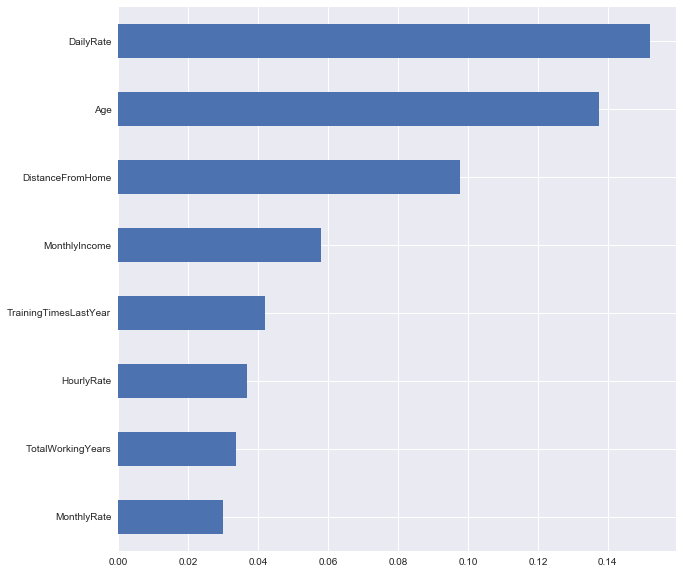

RandomForestClassifier()


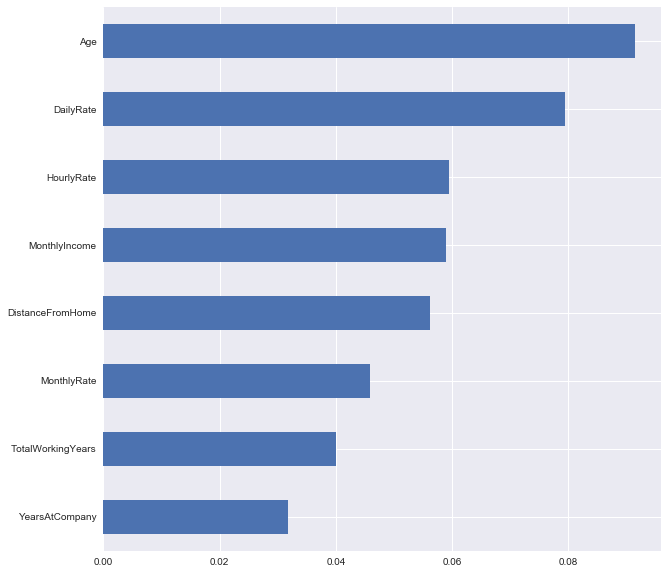

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


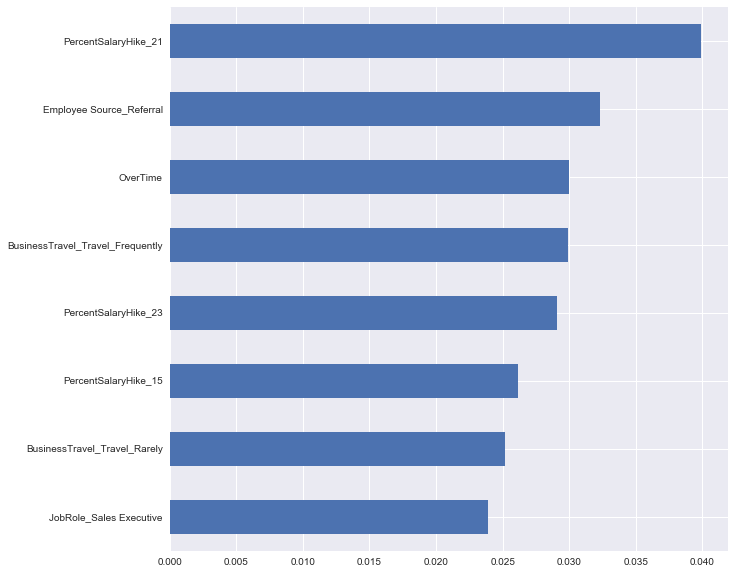

ExtraTreesClassifier()


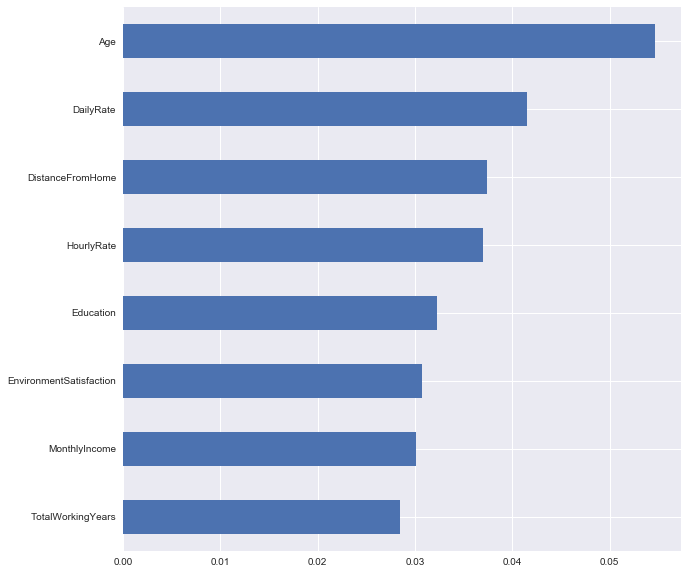

In [303]:
for i in pipeline:
    i.fit(X,y)
    i.feature_importances_
    print(i)
    imp_features = pd.Series(i.feature_importances_,index=X.columns)
    plt.figure(figsize =(10,10))
    imp_features.nlargest(8).sort_values(ascending=True).plot(kind='barh')

    plt.show()

In [304]:
a=[]
for i in pipeline:
    i.fit(X,y)
    i.feature_importances_
    imp_features = pd.Series(i.feature_importances_,index=X.columns)
    x = pd.DataFrame(imp_features.nlargest(8).sort_values(ascending=False))
    a.append(x.index.values)
    b=pd.DataFrame(a)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:37:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [305]:
c=b.T
c

,0,1,2,3
0,DailyRate,Age,PercentSalaryHike_21,Age
1,Age,DailyRate,Employee Source_Referral,DailyRate
2,DistanceFromHome,HourlyRate,OverTime,DistanceFromHome
3,MonthlyIncome,MonthlyIncome,BusinessTravel_Travel_Frequently,HourlyRate
4,HourlyRate,DistanceFromHome,PercentSalaryHike_23,Education
5,TrainingTimesLastYear,MonthlyRate,PercentSalaryHike_15,EnvironmentSatisfaction
6,TotalWorkingYears,TotalWorkingYears,BusinessTravel_Travel_Rarely,MonthlyIncome
7,BusinessTravel_Travel_Frequently,YearsAtCompany,JobRole_Sales Executive,TotalWorkingYears


In [306]:
c[0]

0                           DailyRate
1                                 Age
2                    DistanceFromHome
3                       MonthlyIncome
4                          HourlyRate
5               TrainingTimesLastYear
6                   TotalWorkingYears
7    BusinessTravel_Travel_Frequently
Name: 0, dtype: object

In [307]:
d=pd.DataFrame()
for i in c.columns:
    d=pd.concat([d,c[i]],ignore_index=True)
print(d)

                                   0
0                          DailyRate
1                                Age
2                   DistanceFromHome
3                      MonthlyIncome
4                         HourlyRate
5              TrainingTimesLastYear
6                  TotalWorkingYears
7   BusinessTravel_Travel_Frequently
8                                Age
9                          DailyRate
10                        HourlyRate
11                     MonthlyIncome
12                  DistanceFromHome
13                       MonthlyRate
14                 TotalWorkingYears
15                    YearsAtCompany
16              PercentSalaryHike_21
17          Employee Source_Referral
18                          OverTime
19  BusinessTravel_Travel_Frequently
20              PercentSalaryHike_23
21              PercentSalaryHike_15
22      BusinessTravel_Travel_Rarely
23           JobRole_Sales Executive
24                               Age
25                         DailyRate
2

In [308]:
d = d.rename(columns={0: 'Imp_Features'})

In [309]:

d

,Imp_Features
0,DailyRate
1,Age
2,DistanceFromHome
3,MonthlyIncome
4,HourlyRate
5,TrainingTimesLastYear
6,TotalWorkingYears
7,BusinessTravel_Travel_Frequently
8,Age
9,DailyRate


In [310]:

d['Imp_Features'].value_counts()

Age                                 3
DistanceFromHome                    3
TotalWorkingYears                   3
MonthlyIncome                       3
DailyRate                           3
HourlyRate                          3
BusinessTravel_Travel_Frequently    2
JobRole_Sales Executive             1
EnvironmentSatisfaction             1
BusinessTravel_Travel_Rarely        1
MonthlyRate                         1
Employee Source_Referral            1
TrainingTimesLastYear               1
PercentSalaryHike_15                1
PercentSalaryHike_21                1
Education                           1
PercentSalaryHike_23                1
OverTime                            1
YearsAtCompany                      1
Name: Imp_Features, dtype: int64

In [311]:
d['Imp_Features'].unique()

array(['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome',
       'HourlyRate', 'TrainingTimesLastYear', 'TotalWorkingYears',
       'BusinessTravel_Travel_Frequently', 'MonthlyRate',
       'YearsAtCompany', 'PercentSalaryHike_21',
       'Employee Source_Referral', 'OverTime', 'PercentSalaryHike_23',
       'PercentSalaryHike_15', 'BusinessTravel_Travel_Rarely',
       'JobRole_Sales Executive', 'Education', 'EnvironmentSatisfaction'],
      dtype=object)

In [312]:
df2

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,...,PercentSalaryHike_16,PercentSalaryHike_17,PercentSalaryHike_18,PercentSalaryHike_19,PercentSalaryHike_20,PercentSalaryHike_21,PercentSalaryHike_22,PercentSalaryHike_23,PercentSalaryHike_24,PercentSalaryHike_25,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
0,5.378612,1,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,8.0,1,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5.378612,1,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,4.0,1,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,5.378612,1,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,8.0,1,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,5.378612,1,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,4.0,1,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5.378612,1,262.724580,0.698834,2.0,2.0,0,48.381803,3.0,2.0,4,3.866552,1543.210625,8.0,1,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,6.147757,0,114.538506,0.698834,4.0,3.0,1,47.532510,1.0,3.0,4,3.948513,1598.313517,0.0,0,4.0,3.0,1.0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
23429,6.147757,0,114.538506,0.698834,4.0,3.0,1,47.532510,1.0,3.0,4,3.948513,1598.313517,3.0,0,3.0,3.0,1.0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
23430,6.147757,0,114.538506,0.698834,4.0,3.0,1,47.532510,1.0,3.0,4,3.948513,1598.313517,0.0,0,3.0,3.0,1.0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
23431,6.147757,0,114.538506,0.698834,4.0,3.0,1,47.532510,1.0,3.0,4,3.948513,1598.313517,3.0,0,4.0,3.0,1.0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1]:
new_X=df2[['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome',
       'TrainingTimesLastYear', 'TotalWorkingYears', 'MonthlyRate',
       'HourlyRate', "PercentSalaryHike",'BusinessTravel_Travel_Frequently', 'OverTime', 'StockOptionLevel']]
new_X

NameError: name 'df2' is not defined